<a href="https://colab.research.google.com/github/fabriirguez/Full-NumPy-pandas-to-ML/blob/main/repaso_numpy_pandas_para_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10 MINUTOS PARA PANDAS (TUTORIAL)

**Estructuras de datos básicas en pandas**

In [ ]:
In [1]: import numpy as np
#
In [2]: import pandas as pd


Este código importa **dos librerías muy comunes en Python** para el análisis y manipulación de datos:

**import numpy as np:** Importa la librería NumPy. NumPy es fundamental para la computación numérica en Python, especialmente para trabajar con arrays multidimensionales y realizar operaciones matemáticas de alto rendimiento. Se le da el alias np por convención para facilitar su uso.


**import pandas as pd:** Importa la librería Pandas. Pandas es una herramienta poderosa para el análisis y manipulación de datos, ofreciendo estructuras de datos como Series y DataFrame que son muy eficientes para trabajar con datos tabulares. Se le da el alias pd por convención.

**Estructuras de datos básicas en pandas Pandas proporciona dos tipos de clases para manejar datos:**

**Series:** una matriz etiquetada unidimensional que contiene datos de cualquier tipo como números enteros, cadenas, objetos Python, etc.

**DataFrame:** una estructura de datos bidimensional que contiene datos como una matriz bidimensional o una tabla con filas y columnas.

**10 MINUTOS PARA PANDAS (TUTORIAL)**

Este cuaderno proporcionará una introducción rápida y práctica a la biblioteca Pandas de Python, una herramienta fundamental para el análisis de datos. Aprenderás las estructuras de datos básicas como Series y DataFrames, y cómo crearlas y manipularlas.

**EJERCICIO 1 (ESTRUCTURAS)**

In [ ]:
import numpy as np
import pandas as pd

# Ejercicio 1 (Estructuras)
df_edades = pd.DataFrame({
    'nombre': ['Ana', 'Bob', np.nan, 'Clara'],
    'edad': [25, 30, np.nan, 35]
})

# 1) Muestra solo 'edad'
df_edades[['edad']]     # (como DataFrame)
# df_edades['edad']     # (como Serie, también vale)

# 2) Cuenta NaN con isna().sum()
df_edades.isna().sum()          # NaN por columna
# df_edades['edad'].isna().sum()  # NaN solo en 'edad'


,0
nombre,1
edad,1


**PREGUNTA 1 (ESTRUCTURAS)**

In [ ]:
import numpy as np
import pandas as pd

np.array([1, np.nan, 3]).mean()
pd.Series([1, np.nan, 3]).mean()


np.float64(2.0)

¿Qué pasa y por qué Pandas da diferente?:

**NumPy (array.mean):** si hay un NaN, la operación normal propaga el NaN : el resultado es NaN.
Porque mean() no ignora NaN por defecto.

**Pandas (Series.mean):** por defecto tiene skipna=True, o sea ignora los NaN y calcula la media con los valores válidos:

**media** =(1+3)/2 =2.0

**Si quieres que Pandas se comporte como NumPy (propagando NaN):**

In [ ]:
pd.Series([1, np.nan, 3]).mean(skipna=False)


np.float64(nan)

**Y si queremos que NumPy ignore NaN como Pandas:**

In [ ]:
np.nanmean([1, np.nan, 3])


np.float64(2.0)

## Creación de objetos

### Series

Una Serie de Pandas es un objeto similar a un arreglo unidimensional capaz de contener cualquier tipo de dato (enteros, cadenas, flotantes, objetos Python, etc.). Los ejes de una serie están etiquetados, lo que permite un acceso más flexible a los datos. Puedes crear una Serie a partir de una lista, un array de NumPy o un diccionario.

**Creación de una Serie a partir de una lista:**
```python
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)
```

**Creación de una Serie con un índice personalizado:**
```python
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print(s)
```

## Series


**Razonamiento**:
Creamos una serie de pandas con una lista que incluya `np.nan` y luego mostrarla. Este bloque de código realizará ambos pasos.



In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print("Pandas Series 's':\n", s)

Pandas Series 's':
 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


## Creación de DataFrame

Un DataFrame es una estructura de datos bidimensional con columnas que pueden tener tipos de datos diferentes. Es similar a una hoja de cálculo o una tabla SQL, o un diccionario de objetos Series. Es la estructura de datos más utilizada en pandas.

### Creación de un DataFrame a partir de un array de NumPy con fechas

Podemos crear un DataFrame pasando un array de NumPy, con un índice de `datetime` y columnas etiquetadas. Por ejemplo, podemos generar un rango de fechas y usarlo como índice.

```python
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)
```
DataFrame = tabla .

-index=dates pone fechas como filas.

-columns=list("ABCD") pone nombres de columnas.

-Esto sirve para practicar selección/filtrado/operaciones, base de ML.

**Razonamiento**:
El bloque de Markdown anterior introdujo la creación de un DataFrame a partir de un **array NumPy con fechas**. El siguiente paso lógico es proporcionar el código Python para crear y mostrar este DataFrame.


In [ ]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01  1.497359  0.246028 -1.059425 -1.032700
2013-01-02 -0.441479 -1.244351  0.844167  0.833817
2013-01-03 -1.291171 -1.059910  0.726342 -0.219439
2013-01-04 -0.284494  0.680480 -0.466860 -0.423375
2013-01-05  0.773331 -0.170864 -0.676008 -0.446990
2013-01-06 -0.369991 -1.668896 -0.006390  1.438738


### Creación de un DataFrame a partir de un diccionario de objetos

También podemos crear un DataFrame pasando un diccionario de objetos. Esto es muy común cuando se tienen datos ya estructurados en forma de clave-valor donde cada clave puede representar una columna y sus valores la serie de datos para esa columna.

```python
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical([&quot;test&quot;, &quot;train&quot;, &quot;test&quot;, &quot;train&quot;]),
    'F': 'foo'
})
print(df2)
```

**Razonamiento**:
El bloque de Markdown anterior proporcionó la explicación y el código de ejemplo para crear un DataFrame a partir de un diccionario de objetos. Ahora, necesito proporcionar el código Python para ejecutar esta creación y mostrar el DataFrame resultante, completando así esta parte de la subtarea.



In [ ]:
import numpy as np
import pandas as pd

df2 = pd.DataFrame({
    'A': 1.0, #float
    'B': pd.Timestamp('20130102'), #fecha (datetime)
    'C': pd.Series(1, index=list(range(4)), dtype='float32'), #serie float 32
    'D': np.array([3] * 4, dtype='int32'), #array int32
    'E': pd.Categorical(["test", "train", "test", "train"]), #categoria
    'F': 'foo' #string / object
})
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


**Visualizar tipos de columna (dytypes)**

**dtypes** muestra el tipo de cada columna.

Ejemplos:

-category se suele convertir con one-hot encoding,

-datetime se transforma en features como año/mes/día.

-float32/int32 afectan memoria y rendimiento.

In [ ]:
df2.dtypes


,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


**df2.<TAB>**

NO se ejecuta como código normal en Colab. Es una función del autocompletado del editor (cuando escribes df2. y pulsas Tab).

En Colab para "demostrar" hacemos:

In [ ]:
# En notebooks, el autocompletado ocurre al escribir df2. y pulsar TAB.
# Para ver columnas de forma explícita:
df2.columns


Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

y también:

In [ ]:
# Acceder a una columna por atributo funciona si el nombre es válido (sin espacios, etc.)
df2.A


,A
0,1.0
1,1.0
2,1.0
3,1.0


## Datos de visualización

## Visualizar primeras y últimas filas: head() and tail()




**Razonamiento**:
Se requiere demostrar `df.head()` y `df.tail(3)`.

In [ ]:
# head() muestra las primeras filas (por defecto 5)
df.head()


,A,B,C,D
2013-01-01,0.702348,-1.645057,-1.904155,-0.079501
2013-01-02,0.821376,-1.064606,-0.584898,0.232308
2013-01-03,0.561820,0.852461,0.906216,1.488602
2013-01-04,-0.064232,0.205041,-0.725419,1.279978
2013-01-05,1.821505,-0.133100,-0.030030,2.083901


In [ ]:
# tail(n) muestra las últimas n filas
df.tail(3)


,A,B,C,D
2013-01-04,-0.064232,0.205041,-0.725419,1.279978
2013-01-05,1.821505,-0.133100,-0.030030,2.083901
2013-01-06,0.340070,-1.797229,1.342426,-0.383035


## head() and tail()


`df.head()`: Este método se utiliza para mostrar las primeras N filas de un DataFrame (por defecto, muestra las primeras 5 filas si no se especifica N). Es útil para una vista rápida de la estructura de los datos, los tipos de datos y si la carga fue exitosa, especialmente con conjuntos de datos grandes.

`df.tail(N)`: Este método se utiliza para mostrar las últimas N filas de un DataFrame. Es particularmente útil para verificar la integridad de los datos al final del DataFrame o para ver los datos que han sido añadidos recientemente.



In [ ]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

print("First 5 rows of df:")
print(df.head())
print("\nLast 3 rows of df:")
print(df.tail(3))

First 5 rows of df:
                   A         B         C         D
2013-01-01  0.702348 -1.645057 -1.904155 -0.079501
2013-01-02  0.821376 -1.064606 -0.584898  0.232308
2013-01-03  0.561820  0.852461  0.906216  1.488602
2013-01-04 -0.064232  0.205041 -0.725419  1.279978
2013-01-05  1.821505 -0.133100 -0.030030  2.083901

Last 3 rows of df:
                   A         B         C         D
2013-01-04 -0.064232  0.205041 -0.725419  1.279978
2013-01-05  1.821505 -0.133100 -0.030030  2.083901
2013-01-06  0.340070 -1.797229  1.342426 -0.383035


**Otra forma más estructurada de visualizar**

### Mostrar el índice del DataFrame

`df.index` devuelve el objeto índice del DataFrame. Para un DataFrame creado con `pd.date_range`, este será un `DatetimeIndex` que contiene las fechas utilizadas como etiquetas de fila.

In [ ]:
(df.index)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

### Mostrar las columnas del DataFrame

`df.columns` devuelve el objeto de índice que contiene los nombres de las columnas del DataFrame. Para un DataFrame como `df`, que se creó con `columns=list('ABCD')`, esto mostrará una lista con 'A', 'B', 'C', 'D'.

In [ ]:
(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')

### Obtener los valores subyacentes del DataFrame como un array NumPy

`df.to_numpy()` convierte el DataFrame a su representación de array NumPy subyacente. Esto es útil cuando se necesitan los datos para operaciones que requieren arrays NumPy, como en librerías de cálculo numérico o aprendizaje automático. Tener en cuenta que si el DataFrame tiene columnas con diferentes tipos de datos, el array NumPy resultante tendrá un tipo de datos que pueda acomodar todos ellos (por ejemplo, `object` si hay mezclas de tipos).

In [ ]:
(df.to_numpy())

array([[ 0.70234829, -1.64505712, -1.90415531, -0.07950131],
       [ 0.82137629, -1.06460643, -0.58489779,  0.23230807],
       [ 0.56181999,  0.8524615 ,  0.90621603,  1.48860214],
       [-0.06423182,  0.2050405 , -0.72541875,  1.27997766],
       [ 1.82150508, -0.13310017, -0.03003   ,  2.08390124],
       [ 0.34006969, -1.79722892,  1.34242592, -0.38303454]])

## df.to_numpy()

### Explicación de `df.to_numpy()`

El método `df.to_numpy()` en Pandas se utiliza para convertir un DataFrame de Pandas a su representación subyacente como un array de NumPy. Esto es útil en varias situaciones:

*   **Compatibilidad con Librerías Numéricas y de Machine Learning**: Muchas librerías de cálculo numérico (como NumPy) y de aprendizaje automático (como Scikit-learn, TensorFlow o PyTorch) esperan arrays de NumPy como entrada. `to_numpy()` permite transformar los datos de un DataFrame en el formato requerido por estas librerías.
*   **Operaciones de Alto Rendimiento**: Aunque Pandas está construido sobre NumPy, acceder a los datos directamente como un array de NumPy puede ser más eficiente para ciertas operaciones de bajo nivel o cuando se necesita evitar la sobrecarga de los DataFrames de Pandas (como la gestión de índices y etiquetas de columna) para cálculos puros.
*   **Homogeneidad de Tipos de Datos**: Si un DataFrame contiene columnas con diferentes tipos de datos, el array de NumPy resultante intentará encontrar un tipo de datos común que pueda acomodar todos los elementos. Por ejemplo, si hay una mezcla de enteros y flotantes, el array resultante será de tipo flotante. Si hay objetos o cadenas, el tipo resultante podría ser `object`.

En resumen, `df.to_numpy()` extrae los valores numéricos o de cadena del DataFrame y los presenta como una matriz eficiente para su uso en contextos donde la estructura tabular de Pandas no es necesaria o no es la esperada.

## Agregar dtype al código de to_numpy()
Insertar una celda de código para demostrar `df2.dtypes` y `df2.to_numpy()` para mostrar el comportamiento de dtype.


In [ ]:
df2.dtypes

,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


In [ ]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [ ]:
print("df2 dtypes:")
print(df2.dtypes)

df2_numpy = df2.to_numpy()
print("\ndf2 as NumPy array:")
print(df2_numpy)

print("\nNumPy array dtype:")
print(df2_numpy.dtype)

df2 dtypes:
A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

df2 as NumPy array:
[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]

NumPy array dtype:
object


Otra forma de visualizarlo más estructurada

## Diferencia en el Manejo de dtypes: NumPy vs. Pandas con `to_numpy()`

Cuando un DataFrame de Pandas con múltiples tipos de datos en sus columnas (como `df2`) se convierte a un array de NumPy utilizando `df.to_numpy()`, es común que el array resultante tenga un `dtype` de `object`.

Esto se debe a una diferencia fundamental en cómo NumPy y Pandas manejan los tipos de datos:

*   **Arrays de NumPy**: Los arrays de NumPy son inherentemente **homogéneos**. Esto significa que todos los elementos dentro de un array de NumPy deben ser del mismo tipo de datos. Si el DataFrame original contiene columnas con tipos de datos dispares (por ejemplo, flotantes, fechas, enteros y cadenas), NumPy debe encontrar un `dtype` que pueda contener todos ellos. En muchos casos, el `object` dtype es el tipo más general que puede acomodar una mezcla de diferentes tipos de objetos Python.

*   **DataFrames de Pandas**: A diferencia de los arrays de NumPy, los DataFrames de Pandas son **heterogéneos** a nivel de columna. Cada columna de un DataFrame puede tener su propio `dtype` específico (como `float64`, `datetime64[ns]`, `int32`, `category`, `object`, etc.). Esta flexibilidad permite a Pandas almacenar y manipular datos de manera eficiente, optimizando el uso de memoria y las operaciones para cada tipo de columna individualmente.

En resumen, mientras que Pandas gestiona la diversidad de tipos de datos a nivel de columna, NumPy los fuerza a una homogeneidad, lo que a menudo resulta en un `object` dtype cuando se convierte un DataFrame con tipos mixtos.

## describe()

Demostración `df.describe()`.


In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.697148,-0.597082,-0.165977,0.770376
std,0.633270,1.069303,1.179245,0.984180
min,-0.064232,-1.797229,-1.904155,-0.383035
25%,0.395507,-1.499944,-0.690289,-0.001549
50%,0.632084,-0.598853,-0.307464,0.756143
75%,0.791619,0.120505,0.672155,1.436446
max,1.821505,0.852461,1.342426,2.083901


## describe()

### Explicación de `df.describe()`

El método `df.describe()` genera estadísticas descriptivas de las columnas numéricas de un DataFrame, lo que es extremadamente útil para obtener un resumen rápido de la distribución de los datos. Esta función ignora automáticamente los valores `NaN`.

La salida incluye las siguientes estadísticas para cada columna numérica:

*   **`count`**: El número de valores no nulos en la columna. Esto es útil para identificar columnas con valores faltantes.
*   **`mean`**: La media aritmética de los valores. Indica el valor promedio.
*   **`std`**: La desviación estándar. Mide la dispersión o variabilidad de los datos alrededor de la media.
*   **`min`**: El valor mínimo en la columna.
*   **`25%` (primer cuartil)**: El 25% de los datos son menores o iguales a este valor. También conocido como Q1.
*   **`50%` (mediana o segundo cuartil)**: El valor central de los datos cuando están ordenados. El 50% de los datos son menores o iguales a este valor. También conocido como Q2.
*   **`75%` (tercer cuartil)**: El 75% de los datos son menores o iguales a este valor. También conocido como Q3.
*   **`max`**: El valor máximo en la columna.

Estas estadísticas proporcionan una visión general de la tendencia central, dispersión y forma de la distribución de cada variable, lo cual es fundamental en la fase de Exploración de Datos (EDA) en cualquier proyecto de análisis de datos o Machine Learning.

## Transpose (T)



In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.702348,0.821376,0.561820,-0.064232,1.821505,0.340070
B,-1.645057,-1.064606,0.852461,0.205041,-0.133100,-1.797229
C,-1.904155,-0.584898,0.906216,-0.725419,-0.030030,1.342426
D,-0.079501,0.232308,1.488602,1.279978,2.083901,-0.383035


## Transpose (T)

### Explicación de `df.T`

El atributo `.T` en un DataFrame de Pandas se utiliza para **transponer el DataFrame**, lo que significa intercambiar las filas por las columnas. Es decir, las columnas originales se convierten en filas y las filas originales se convierten en columnas.

Esto es útil en varias situaciones:

*   **Cambio de Perspectiva**: A veces, visualizar o analizar los datos es más claro cuando las variables (columnas) se presentan como filas y las observaciones (filas) como columnas. Esto puede ser especialmente cierto cuando se tienen muchas columnas y pocas filas, o viceversa.
*   **Preparación para Ciertos Algoritmos**: Algunos algoritmos o funciones pueden esperar los datos en un formato específico (por ejemplo, características como filas en lugar de columnas), y la transposición facilita esta reorganización.
*   **Comparación de Series Temporales**: Si cada columna representa una serie temporal y se desea comparar el comportamiento de las series a lo largo de los mismos puntos temporales, transponer el DataFrame puede hacer que cada serie temporal sea una fila, facilitando comparaciones visuales o estadísticas.
*   **Simplificación de Operaciones**: En ciertos casos, una operación que es compleja de realizar a lo largo de las columnas se vuelve más sencilla al realizarla a lo largo de las filas después de una transposición.

## sort_index()

Demostarción `df.sort_index(axis=1, ascending=False)`.


**Reasoning**:
The subtask requires demonstrating `df.sort_index(axis=1, ascending=False)`. I will create a code cell to perform this operation and print the resulting sorted DataFrame.



In [ ]:
# axis=1 significa ordenar las columnas
# ascending=False ordena de Z→A (o D→A)
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2013-01-01,-0.079501,-1.904155,-1.645057,0.702348
2013-01-02,0.232308,-0.584898,-1.064606,0.821376
2013-01-03,1.488602,0.906216,0.852461,0.561820
2013-01-04,1.279978,-0.725419,0.205041,-0.064232
2013-01-05,2.083901,-0.030030,-0.133100,1.821505
2013-01-06,-0.383035,1.342426,-1.797229,0.340070


## sort_index() (por columnas)

El método `df.sort_index()` se utiliza para ordenar el DataFrame por sus etiquetas de índice o de columna. Los parámetros clave son:

*   **`axis`**: Este parámetro especifica qué eje ordenar:
    *   `axis=0` (o `index`): Ordena por las etiquetas del índice (filas).
    *   `axis=1` (o `columns`): Ordena por las etiquetas de las columnas. Este fue el caso del ejemplo anterior.

*   **`ascending`**: Este parámetro booleano controla el orden de la clasificación:
    *   `True` (por defecto): Ordena en orden ascendente (A-Z, 0-9).
    *   `False`: Ordena en orden descendente (Z-A, 9-0).

En el ejemplo `df.sort_index(axis=1, ascending=False)`, hemos ordenado las columnas del DataFrame `df` en orden alfabético descendente. Esto es útil para:

*   **Organización y Visualización**: Reorganizar las columnas puede hacer que el DataFrame sea más fácil de leer o presentar, especialmente si hay un orden lógico deseado para las variables.
*   **Preparación de Datos**: A veces, ciertos pasos de procesamiento o modelos de Machine Learning esperan las características en un orden específico, y `sort_index()` puede ayudar a cumplir con ese requisito.

## Ordenar por valores: sort_values()

In [ ]:
df.sort_values(by="B")


,A,B,C,D
2013-01-06,0.340070,-1.797229,1.342426,-0.383035
2013-01-01,0.702348,-1.645057,-1.904155,-0.079501
2013-01-02,0.821376,-1.064606,-0.584898,0.232308
2013-01-05,1.821505,-0.133100,-0.030030,2.083901
2013-01-04,-0.064232,0.205041,-0.725419,1.279978
2013-01-03,0.561820,0.852461,0.906216,1.488602


### df.sort_values()

El método `df.sort_values(by="B")` ordena las filas del DataFrame según los valores de la columna especificada, en este caso, la columna "B".

*   **`by`**: Este parámetro es fundamental y especifica el nombre de la columna (o una lista de columnas) por la cual se desea ordenar el DataFrame.
*   **`ascending`** (opcional, por defecto `True`): Un valor booleano que determina el orden de clasificación.
    *   `True`: Orden ascendente (de menor a mayor). (por defecto)
    *   `False`: Orden descendente (de mayor a menor).

En el contexto del análisis exploratorio de datos, `sort_values()` es extremadamente útil para:

*   **Identificar extremos**: Permite ver rápidamente qué filas tienen los valores más bajos o más altos en una columna particular, lo cual es útil para detectar valores atípicos (outliers) o comprender el rango de los datos.
*   **Análisis de tendencias**: Si se combina con otras operaciones, puede ayudar a identificar tendencias o patrones en los datos cuando se ordenan por una variable clave.
*   **Preparación para visualización**: Ordenar los datos puede hacer que los gráficos y tablas sean más legibles y fáciles de interpretar.

**EJERCICIO 2 (VISUALIZACIÓN)**

In [ ]:
import numpy as np
import pandas as pd

# (por si acaso) recreamos df_edades
df_edades = pd.DataFrame({
    'nombre': ['Ana','Bob',np.nan,'Clara'],
    'edad': [25,30,np.nan,35]
})

# 1) describe()
desc_antes = df_edades.describe()
desc_antes


,edad
count,3.0
mean,30.0
std,5.0
min,25.0
25%,27.5
50%,30.0
75%,32.5
max,35.0


**Explicación**

**describe()** en columnas numéricas muestra: count, mean, std, min, 25%, 50%, 75%, max.
count cuenta solo valores NO-NaN.

**Limpiar NaN** :

In [ ]:
# 2) Limpia NaN: fillna(edad_mean)
edad_mean = df_edades["edad"].mean()   # por defecto ignora NaN (skipna=True)
df_edades_limpio = df_edades.copy()
df_edades_limpio["edad"] = df_edades_limpio["edad"].fillna(edad_mean)

edad_mean, df_edades_limpio


(np.float64(30.0),
   nombre  edad
 0    Ana  25.0
 1    Bob  30.0
 2    NaN  30.0
 3  Clara  35.0)

In [ ]:
desc_despues = df_edades_limpio.describe()
desc_despues


,edad
count,4.000000
mean,30.000000
std,4.082483
min,25.000000
25%,28.750000
50%,30.000000
75%,31.250000
max,35.000000


**¿Qué pasó con count?**

**Antes:** count en edad era 3 porque había 1 NaN (25, 30, 35).

**Después:** count pasa a 4 porque ya no hay NaN: se rellenó con la media

**PREGUNTA 2 (VISUALIZACIÓN)**

**¿df.to_numpy() vs df.values?**


**df.to_numpy()** es el método recomendado y explícito para obtener un numpy.ndarray.

**df.values** es una propiedad “legacy” (histórica). En general devuelve lo mismo, pero to_numpy() es más claro y configurable.

In [ ]:
arr1 = df.to_numpy()
arr2 = df.values
type(arr1), type(arr2)


(numpy.ndarray, numpy.ndarray)

**¿dtype único?**

Sí, en NumPy, un array 2D tiene un solo dtype para todo el array.
En un DataFrame, cada columna puede tener un dtype distinto (ej: float, int, datetime, category, str).
Al hacer to_numpy(), Pandas busca un dtype común que pueda contenerlo todo:
Si todo es numérico → dtype numérico (float/int)
Si hay mezcla (fechas + strings + categorías) → suele convertirse a dtype=object

In [ ]:
#ejemplo con df2
df2.dtypes
df2.to_numpy().dtype


dtype('O')

**to_numpy()** es útil para modelos/operaciones NumPy, pero si tu DataFrame tiene texto/categorías/fechas, te puede salir object : normalmente antes haces limpieza/encoding.

### 3. Selección

(NOTA RECOMENDABLE)
En esta sección, exploraremos las diferentes formas de seleccionar datos de un DataFrame en Pandas. Es crucial entender cómo acceder a partes específicas de tus datos para el análisis y la manipulación. Cubriremos métodos clave como la selección por `[]` (obtener artículo), la selección por etiqueta (`.loc` y `.at`) y la selección por posición entera (`.iloc` y `.iat`). Estos métodos son fundamentales para trabajar eficazmente con DataFrames.

### 3.1 Obtener artículo


In [ ]:
print("1. Seleccionar columna 'A' con df['A']:")
print(df['A'])
print("\n2. Seleccionar columna 'A' con df.A (attribute access):")
print(df.A)
print("\n3. Seleccionar columnas 'B' y 'A' con df[['B', 'A']]:")
print(df[['B', 'A']])
print("\n4. Seleccionar las primeras tres filas con df[0:3]:")
print(df[0:3])
print("\n5. Seleccionar un rango de filas por fechas con df['20130102':'20130104']:")
print(df['20130102':'20130104'])

1. Seleccionar columna 'A' con df['A']:
2013-01-01    1.250412
2013-01-02   -0.558930
2013-01-03    1.342670
2013-01-04    0.815420
2013-01-05   -0.133407
2013-01-06   -0.630654
Freq: D, Name: A, dtype: float64

2. Seleccionar columna 'A' con df.A (attribute access):
2013-01-01    1.250412
2013-01-02   -0.558930
2013-01-03    1.342670
2013-01-04    0.815420
2013-01-05   -0.133407
2013-01-06   -0.630654
Freq: D, Name: A, dtype: float64

3. Seleccionar columnas 'B' y 'A' con df[['B', 'A']]:
                   B         A
2013-01-01  0.759091  1.250412
2013-01-02 -1.197196 -0.558930
2013-01-03  0.935071  1.342670
2013-01-04  0.775983  0.815420
2013-01-05  1.812235 -0.133407
2013-01-06 -0.373041 -0.630654

4. Seleccionar las primeras tres filas con df[0:3]:
                   A         B         C         D
2013-01-01  1.250412  0.759091  0.350458  0.339870
2013-01-02 -0.558930 -1.197196  0.529612  0.600077
2013-01-03  1.342670  0.935071 -0.988443 -0.899318

5. Seleccionar un rango de fila

**Explicacación**:

**df["A"]** → columna como Series

**df[["B","A"]]** → varias columnas como DataFrame

**df[0:3]** → filas por posición (como listas Python)

**df["fecha1":"fecha2"]** → filas por etiqueta de index (aquí fechas)



### Explicación de los ejemplos de "Obtener artículo [] (Get item)"

La selección de datos utilizando la notación de corchetes `[]` en Pandas es una de las formas más comunes y flexibles de acceder a partes de un DataFrame o Serie. Aquí se explican los ejemplos proporcionados:

1.  **Seleccionar una sola columna (`df['A']` o `df.A`)**:
    *   `df['A']`: Esta es la forma preferida y más robusta de seleccionar una columna. Siempre funciona, incluso si el nombre de la columna contiene espacios o caracteres especiales, o si coincide con un atributo de DataFrame (como `count` o `sum`). Devuelve una `Serie` de Pandas.
    *   `df.A`: Esta es una forma abreviada de acceder a una columna como un atributo. Es conveniente y más concisa, pero solo funciona si el nombre de la columna es un identificador válido en Python (sin espacios, sin caracteres especiales, y no coincide con un atributo o método existente del DataFrame). También devuelve una `Serie`.

2.  **Seleccionar múltiples columnas (`df[['B', 'A']]`)**:
    *   Para seleccionar varias columnas, se debe pasar una **lista de nombres de columna** dentro de los corchetes. Esto devuelve un nuevo DataFrame que contiene solo las columnas especificadas, en el orden en que se listaron. Es importante notar el doble corchete: el corchete exterior es para la selección de item, y el corchete interior es la lista de nombres de columnas.

3.  **Seleccionar filas por posición entera (`df[0:3]`)**:
    *   Cuando se usan slices de números enteros (por ejemplo, `0:3`), Pandas interpreta esto como una selección de filas por su **posición numérica**. Funciona de manera similar a cómo se segmentan las listas en Python. `df[0:3]` seleccionará las filas con índice posicional 0, 1 y 2 (el 3 es exclusivo).

4.  **Seleccionar un rango de filas por fechas (`df['20130102':'20130104']`)**:
    *   Si el índice del DataFrame es un `DatetimeIndex` (como en el caso de nuestro `df`), se pueden seleccionar filas utilizando un rango de fechas. Pandas interpretará las cadenas de fecha como etiquetas de índice. En este caso, `df['20130102':'20130104']` seleccionará todas las filas desde la fecha '2013-01-02' hasta la fecha '2013-01-04', **inclusive**.

### 3.2 Selección por etiqueta: loc y at

In [ ]:
print("Original DataFrame df:")
print(df)

print("\n1. Seleccionar la fila de la primera fecha con df.loc[dates[0]]:")
print(df.loc[dates[0]])

print("\n2. Seleccionar todas las filas y columnas 'A' y 'B' con df.loc[:, ['A', 'B']]:")
print(df.loc[:, ['A', 'B']])

print("\n3. Seleccionar filas del '20130102' al '20130104' y columnas 'A' y 'B' con df.loc['20130102':'20130104', ['A', 'B']]:")
print(df.loc['20130102':'20130104', ['A', 'B']])

print("\n4. Seleccionar el valor escalar en la intersección de la primera fecha y la columna 'A' con df.loc[dates[0], 'A']:")
print(df.loc[dates[0], 'A'])

print("\n5. Acceso escalar rápido para el valor en la intersección de la primera fecha y la columna 'A' con df.at[dates[0], 'A']:")
print(df.at[dates[0], 'A'])

Original DataFrame df:
                   A         B         C         D
2013-01-01  1.250412  0.759091  0.350458  0.339870
2013-01-02 -0.558930 -1.197196  0.529612  0.600077
2013-01-03  1.342670  0.935071 -0.988443 -0.899318
2013-01-04  0.815420  0.775983 -0.079256  0.328135
2013-01-05 -0.133407  1.812235  1.385043  0.550795
2013-01-06 -0.630654 -0.373041 -1.212583  2.348818

1. Seleccionar la fila de la primera fecha con df.loc[dates[0]]:
A    1.250412
B    0.759091
C    0.350458
D    0.339870
Name: 2013-01-01 00:00:00, dtype: float64

2. Seleccionar todas las filas y columnas 'A' y 'B' con df.loc[:, ['A', 'B']]:
                   A         B
2013-01-01  1.250412  0.759091
2013-01-02 -0.558930 -1.197196
2013-01-03  1.342670  0.935071
2013-01-04  0.815420  0.775983
2013-01-05 -0.133407  1.812235
2013-01-06 -0.630654 -0.373041

3. Seleccionar filas del '20130102' al '20130104' y columnas 'A' y 'B' con df.loc['20130102':'20130104', ['A', 'B']]:
                  A         B
2013-01-02

### Explicación de `df.loc` y `df.at`

**`df.loc`**: Es el método principal basado en etiquetas para la selección por fila y columna. Se utiliza con el formato `df.loc[fila_etiqueta, columna_etiqueta]`.

*   **Selección de una fila (`df.loc[dates[0]]`)**: Permite seleccionar una fila completa utilizando su etiqueta de índice. En este caso, `dates[0]` es la etiqueta de la primera fecha, y el resultado es una Serie que representa esa fila.

*   **Selección de múltiples columnas (`df.loc[:, ['A', 'B']]`)**: El operador `:` en la posición de fila indica 'todas las filas'. Luego, se proporciona una lista de etiquetas de columnas `['A', 'B']` para seleccionar solo esas columnas. Esto devuelve un DataFrame con las filas originales y solo las columnas 'A' y 'B'.

*   **Selección por rango de filas y múltiples columnas (`df.loc['20130102':'20130104', ['A', 'B']]`)**: Combina la selección de un rango de etiquetas de índice (fechas inclusivas) con la selección de múltiples columnas. Esto resulta en un DataFrame más pequeño que contiene solo las filas y columnas especificadas.

*   **Selección de un valor escalar (`df.loc[dates[0], 'A']`)**: Accede a un único valor en el DataFrame especificando la etiqueta de la fila y la etiqueta de la columna. Es preciso y retorna el valor en la intersección de ambas etiquetas.

**`df.at`**: Es un método de acceso a datos escalares más rápido que `df.loc` para cuando se necesita acceder a un único valor (escalar) por etiqueta. Se utiliza en el formato `df.at[fila_etiqueta, columna_etiqueta]`.

*   **Acceso escalar rápido (`df.at[dates[0], 'A']`)**: Al igual que `df.loc` para un único valor, `df.at` se utiliza para obtener un valor escalar en una ubicación específica por etiqueta, pero está optimizado para esta operación específica, lo que lo hace más rápido en ciertos escenarios.

En resumen, `df.loc` es la herramienta versátil para selecciones basadas en etiquetas de cualquier tamaño (escalar, serie, dataframe), mientras que `df.at` es una versión optimizada para la selección eficiente de un único valor escalar basado en etiquetas.

### 3.3 Selección por posición entera: iloc y iat

In [ ]:
print("Original DataFrame df:")
print(df)

print("\n1. Seleccionar la cuarta fila (índice 3) con df.iloc[3]:")
print(df.iloc[3])

print("\n2. Seleccionar filas del índice 3 al 4 (exclusivo) y columnas del índice 0 al 1 (exclusivo) con df.iloc[3:5, 0:2]:")
print(df.iloc[3:5, 0:2])

print("\n3. Seleccionar filas específicas (índices 1, 2, 4) y columnas específicas (índices 0, 2) con df.iloc[[1, 2, 4], [0, 2]]:")
print(df.iloc[[1, 2, 4], [0, 2]])

print("\n4. Seleccionar filas del índice 1 al 2 (exclusivo) y todas las columnas con df.iloc[1:3, :]:")
print(df.iloc[1:3, :])

print("\n5. Seleccionar todas las filas y columnas del índice 1 al 2 (exclusivo) con df.iloc[:, 1:3]:")
print(df.iloc[:, 1:3])

print("\n6. Seleccionar el valor escalar en la intersección de la fila de índice 1 y la columna de índice 1 con df.iloc[1, 1]:")
print(df.iloc[1, 1])

print("\n7. Acceso escalar rápido para el valor en la intersección de la fila de índice 1 y la columna de índice 1 con df.iat[1, 1]:")
print(df.iat[1, 1])

Original DataFrame df:
                   A         B         C         D
2013-01-01  1.250412  0.759091  0.350458  0.339870
2013-01-02 -0.558930 -1.197196  0.529612  0.600077
2013-01-03  1.342670  0.935071 -0.988443 -0.899318
2013-01-04  0.815420  0.775983 -0.079256  0.328135
2013-01-05 -0.133407  1.812235  1.385043  0.550795
2013-01-06 -0.630654 -0.373041 -1.212583  2.348818

1. Seleccionar la cuarta fila (índice 3) con df.iloc[3]:
A    0.815420
B    0.775983
C   -0.079256
D    0.328135
Name: 2013-01-04 00:00:00, dtype: float64

2. Seleccionar filas del índice 3 al 4 (exclusivo) y columnas del índice 0 al 1 (exclusivo) con df.iloc[3:5, 0:2]:
                   A         B
2013-01-04  0.815420  0.775983
2013-01-05 -0.133407  1.812235

3. Seleccionar filas específicas (índices 1, 2, 4) y columnas específicas (índices 0, 2) con df.iloc[[1, 2, 4], [0, 2]]:
                   A         C
2013-01-02 -0.558930  0.529612
2013-01-03  1.342670 -0.988443
2013-01-05 -0.133407  1.385043

4. Selec

### Explicación de `df.iloc` y `df.iat`

**`df.iloc`**: Es el método principal basado en **posición entera** para la selección de datos por fila y columna. Se utiliza con el formato `df.iloc[fila_posicion, columna_posicion]`, donde `fila_posicion` y `columna_posicion` son enteros (o slices, o listas de enteros) que representan las posiciones de los elementos.

*   **Selección de una fila (`df.iloc[3]`)**: Permite seleccionar una fila completa utilizando su índice posicional. En este caso, `df.iloc[3]` selecciona la cuarta fila (recordando que los índices empiezan en 0).

*   **Selección de un slice de filas y un slice de columnas (`df.iloc[3:5, 0:2]`)**: Permite seleccionar un rango de filas y un rango de columnas basándose en sus posiciones enteras. El slice `3:5` selecciona las filas en las posiciones 3 y 4 (el 5 es exclusivo), y `0:2` selecciona las columnas en las posiciones 0 y 1 (el 2 es exclusivo).

*   **Selección de filas y columnas específicas no contiguas (`df.iloc[[1, 2, 4], [0, 2]]`)**: Puedes pasar listas de posiciones enteras para seleccionar filas y columnas específicas que no sean contiguas. `[[1, 2, 4]]` selecciona las filas en esas posiciones, y `[[0, 2]]` selecciona las columnas en esas posiciones.

*   **Selección de un slice de filas y todas las columnas (`df.iloc[1:3, :]`)**: El operador `:` se utiliza para indicar 'todas las filas' o 'todas las columnas'. Aquí, selecciona las filas con índices posicionales 1 y 2, y todas las columnas.

*   **Selección de todas las filas y un slice de columnas (`df.iloc[:, 1:3]`)**: Similar al anterior, pero selecciona todas las filas y las columnas con índices posicionales 1 y 2.

*   **Selección de un valor escalar (`df.iloc[1, 1]`)**: Accede a un único valor en el DataFrame especificando la posición entera de la fila y la columna. Retorna el valor en la intersección de ambas posiciones.

**`df.iat`**: Es un método de acceso a datos escalares más rápido que `df.iloc` para cuando se necesita acceder a un único valor (escalar) por **posición entera**. Se utiliza en el formato `df.iat[fila_posicion, columna_posicion]`.

*   **Acceso escalar rápido (`df.iat[1, 1]`)**: Al igual que `df.iloc` para un único valor, `df.iat` se utiliza para obtener un valor escalar en una ubicación específica por posición, pero está optimizado para esta operación específica, lo que lo hace más rápido en ciertos escenarios.

En resumen, `df.iloc` es la herramienta versátil para selecciones basadas en posiciones enteras de cualquier tamaño (escalar, serie, dataframe), mientras que `df.iat` es una versión optimizada para la selección eficiente de un único valor escalar basado en posiciones enteras.

### 3.4 Indexación booleana (Boolean indexing)

In [ ]:
print('DataFrame con valores en la columna "A" mayores que 0:')
print(df[df['A'] > 0])

print('\nDataFrame con todos los valores mayores que 0 (los que no cumplen se convierten en NaN):')
print(df[df > 0])

DataFrame con valores en la columna "A" mayores que 0:
                   A         B         C         D
2013-01-01  1.250412  0.759091  0.350458  0.339870
2013-01-03  1.342670  0.935071 -0.988443 -0.899318
2013-01-04  0.815420  0.775983 -0.079256  0.328135

DataFrame con todos los valores mayores que 0 (los que no cumplen se convierten en NaN):
                   A         B         C         D
2013-01-01  1.250412  0.759091  0.350458  0.339870
2013-01-02       NaN       NaN  0.529612  0.600077
2013-01-03  1.342670  0.935071       NaN       NaN
2013-01-04  0.815420  0.775983       NaN  0.328135
2013-01-05       NaN  1.812235  1.385043  0.550795
2013-01-06       NaN       NaN       NaN  2.348818


### Explicación de la Indexación Booleana

La indexación booleana es una técnica poderosa en Pandas para filtrar datos basados en condiciones. Se utiliza una Serie booleana (es decir, una serie de valores `True`/`False`) para seleccionar filas o elementos de un DataFrame.

1.  **`df[df['A'] > 0]`**: En este caso, se crea una Serie booleana evaluando la condición `df['A'] > 0`. Esta Serie tendrá `True` para cada fila donde el valor en la columna 'A' sea mayor que 0, y `False` en caso contrario. Cuando esta Serie booleana se pasa al DataFrame `df[]`, Pandas selecciona solo aquellas filas donde la condición es `True`.
    *   **Resultado**: Un DataFrame que contiene solo las filas donde los valores en la columna 'A' son positivos.

2.  **`df[df > 0]`**: Aquí, la condición booleana `df > 0` se aplica a **todo el DataFrame**. Esto crea un DataFrame del mismo tamaño que `df`, pero lleno de valores `True` o `False` dependiendo de si el valor correspondiente en `df` cumple la condición. Cuando este DataFrame booleano se usa para indexar `df`, los valores de `df` que cumplen la condición (`True`) se mantienen, y los valores que no la cumplen (`False`) se reemplazan con `NaN` (Not a Number).
    *   **Resultado**: Un DataFrame donde solo los valores originales que eran mayores que 0 permanecen, y los demás se convierten en `NaN`. Esto es útil para resaltar o aislar valores positivos en el conjunto de datos.

### 3.5 Filtrar con isin()

In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.350458,5.0,-0.579104,one
2013-01-02,-0.558930,-1.197196,0.529612,5.0,0.503029,one
2013-01-03,1.342670,0.935071,-0.988443,5.0,0.087727,two
2013-01-04,0.815420,0.775983,-0.079256,5.0,-0.770252,three
2013-01-05,-0.133407,1.812235,1.385043,5.0,-0.533082,four
2013-01-06,-0.630654,-0.373041,-1.212583,5.0,-0.323587,three


In [ ]:
# Filtrar filas donde E está en ["two", "four"]
df2[df2["E"].isin(["two", "four"])]


,A,B,C,D,F,E
2013-01-03,1.342670,0.935071,-0.988443,5.0,0.087727,two
2013-01-05,-0.133407,1.812235,1.385043,5.0,-0.533082,four


### Explicación de `df.isin()`

El método `df.isin()` se utiliza para filtrar un DataFrame (o una Serie) para incluir solo las filas (o elementos) cuyos valores coinciden con los de una lista o secuencia especificada.

En el ejemplo `df2[df2["E"].isin(["two", "four"])]`:

1.  **`df2["E"].isin(["two", "four"])`**: Esto crea una Serie booleana donde `True` indica que el valor correspondiente en la columna 'E' está presente en la lista `["two", "four"]`, y `False` si no lo está.
2.  **`df2[...]`**: Cuando esta Serie booleana se utiliza para indexar el DataFrame `df2`, Pandas selecciona solo las filas para las cuales la Serie booleana es `True`.

Esto es muy útil para:

*   **Filtrar por múltiples criterios**: En lugar de encadenar múltiples condiciones `or` (por ejemplo, `df['E'] == 'value1' | df['E'] == 'value2'`), `isin()` proporciona una forma más concisa y eficiente de verificar la pertenencia a un conjunto de valores.
*   **Selección basada en listas externas**: Permite filtrar un DataFrame basándose en una lista de valores que puede provenir de otra fuente o cálculo.

**Resultado**: Un DataFrame que contiene únicamente las filas donde los valores de la columna 'E' están incluidos en la lista `["two", "four"]`.

### 3.6 Configuración (Setting data)

3.6.1 **Nueva columna alineada por índice**

In [ ]:
s1 = pd.Series(
    [1, 2, 3, 4, 5, 6],
    index=pd.date_range("20130102", periods=6)
)
s1


,0
2013-01-02,1
2013-01-03,2
2013-01-04,3
2013-01-05,4
2013-01-06,5
2013-01-07,6


In [ ]:
# Al asignar, pandas alinea por el índice (fechas)
df["F"] = s1
df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.350458,5.0,NaN
2013-01-02,-0.558930,-1.197196,0.529612,5.0,1.0
2013-01-03,1.342670,0.935071,-0.988443,5.0,2.0
2013-01-04,0.815420,0.775983,-0.079256,5.0,3.0
2013-01-05,-0.133407,1.812235,1.385043,5.0,4.0
2013-01-06,-0.630654,-0.373041,-1.212583,5.0,5.0


### Explicación de la Alineación de Nuevas Columnas por Índice

Cuando se asigna una `Series` (como `s1`) a una nueva columna de un `DataFrame` (como `df['F']`), Pandas realiza automáticamente una **alineación de datos basada en el índice**.

Esto significa que Pandas no simplemente copia los valores de la `Series` en el orden en que aparecen, sino que utiliza los índices de la `Series` y del `DataFrame` para asegurarse de que cada valor se coloque en la fila correcta.

En el ejemplo anterior:

1.  **`s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))`**: Se creó una `Series` `s1` cuyos valores están asociados con un `DatetimeIndex` que coincide parcialmente con el del `DataFrame` `df`.
2.  **`df['F'] = s1`**: Al asignar `s1` a la nueva columna 'F' en `df`, Pandas compara los índices de `s1` con el índice de `df`. Para las fechas que coinciden (por ejemplo, '2013-01-02' a '2013-01-06'), los valores se alinean correctamente. Para las fechas en `df` que no tienen un valor correspondiente en `s1` (como '2013-01-01'), Pandas inserta `NaN` (Not a Number).

**Importancia de la Alineación por Índice:**

*   **Consistencia de Datos**: Garantiza que los datos se vinculen correctamente a las observaciones adecuadas, incluso si los índices de la `Series` y el `DataFrame` no estuvieran en el mismo orden o si tuvieran elementos faltantes (en cuyo caso, Pandas insertaría `NaN` donde no haya coincidencia de índice).
*   **Flexibilidad**: Permite la adición de nuevas características a un `DataFrame` desde diversas fuentes, sin la necesidad de un reordenamiento manual o verificaciones de coherencia, ya que Pandas se encarga de emparejar los datos por las etiquetas de índice.

### 3.6.2 Cambiar valores por etiqueta y por posición

In [ ]:
# Cambiar una celda por etiqueta
df.at[dates[0], "A"] = 0

# Cambiar una celda por posición
df.iat[0, 1] = 0

# Asignar una columna entera con un array NumPy
df.loc[:, "D"] = np.array([5] * len(df))

df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.350458,5.0,NaN
2013-01-02,-0.558930,-1.197196,0.529612,5.0,1.0
2013-01-03,1.342670,0.935071,-0.988443,5.0,2.0
2013-01-04,0.815420,0.775983,-0.079256,5.0,3.0
2013-01-05,-0.133407,1.812235,1.385043,5.0,4.0
2013-01-06,-0.630654,-0.373041,-1.212583,5.0,5.0


### Explicación de Cambiar Valores por Etiqueta y por Posición

Los métodos `df.at`, `df.iat` y `df.loc` no solo sirven para seleccionar datos, sino también para **modificar valores** en un DataFrame de Pandas. Cada uno está optimizado para un tipo específico de modificación:

1.  **`df.at[fila_etiqueta, columna_etiqueta] = valor`**: Este es el método más rápido para cambiar un **único valor escalar por etiqueta**. Está diseñado para la eficiencia cuando se sabe exactamente la etiqueta de la fila y la columna donde se quiere realizar el cambio. En el ejemplo `df.at[dates[0], 'A'] = 0`, el valor en la intersección de la primera fecha y la columna 'A' se estableció a 0.

2.  **`df.iat[fila_posicion, columna_posicion] = valor`**: Similar a `df.at`, pero para cambiar un **único valor escalar por posición entera**. Es el método más rápido para esta tarea cuando se conocen las posiciones numéricas exactas (índices enteros) de la fila y la columna. En el ejemplo `df.iat[0, 1] = 0`, el valor en la primera fila (posición 0) y la segunda columna (posición 1) se estableció a 0.

3.  **`df.loc[fila_selector, columna_selector] = valores`**: Este es el método más versátil para la asignación de valores basada en etiquetas. Permite cambiar:
    *   **Un valor escalar**: Como `df.loc[dates[0], 'A'] = 10`.
    *   **Una fila completa**: `df.loc[dates[0], :] = nuevos_valores_para_fila`.
    *   **Una columna completa**: Como en el ejemplo `df.loc[:, 'D'] = np.array([5] * len(df))`. Aquí, el `:` en la posición de fila indica 'todas las filas', y 'D' es la etiqueta de la columna. Se asigna un array de NumPy (en este caso, todos los valores 5) a la columna 'D'. Pandas se encarga de alinear estos valores con el índice del DataFrame.
    *   **Un subconjunto de filas/columnas**: Por ejemplo, `df.loc['20130102':'20130104', ['A', 'B']] = nuevos_valores`.

Es importante recordar que `df.loc` y `df.iloc` también se pueden usar para asignaciones, pero `df.at` y `df.iat` son preferibles para cambios de valores individuales debido a su mayor eficiencia.

### 3.6.3 “Where operation” con asignación

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.350458,-5.0,NaN
2013-01-02,-0.558930,-1.197196,-0.529612,-5.0,-1.0
2013-01-03,-1.342670,-0.935071,-0.988443,-5.0,-2.0
2013-01-04,-0.815420,-0.775983,-0.079256,-5.0,-3.0
2013-01-05,-0.133407,-1.812235,-1.385043,-5.0,-4.0
2013-01-06,-0.630654,-0.373041,-1.212583,-5.0,-5.0


### Explicación de la “Where operation” con asignación

La “Where operation” con asignación, o asignación condicional, es una técnica muy potente en Pandas que permite modificar valores en un `DataFrame` (o `Series`) basándose en una condición booleana. En esencia, se utiliza una máscara booleana para seleccionar subconjuntos de datos y luego se les asigna nuevos valores.

En los ejemplos proporcionados:

1.  **`df2[df2 > 0] = -df2`**: Aquí, la condición `df2 > 0` crea un `DataFrame` booleano del mismo tamaño que `df2`, donde `True` indica que el valor original es positivo, y `False` indica que no lo es. Al asignar `-df2` a `df2[df2 > 0]`, Pandas solo modifica los valores donde la máscara booleana es `True` (es decir, los positivos), reemplazándolos con su valor negativo. Los valores donde la máscara es `False` (negativos o cero) se mantienen sin cambios.

**Ventajas de la asignación condicional:**

*   **Eficiencia**: Es una forma muy eficiente de realizar modificaciones masivas y condicionales en grandes conjuntos de datos, ya que estas operaciones suelen estar optimizadas a nivel de C.
*   **Claridad de Código**: Permite escribir un código conciso y legible para transformaciones de datos complejas.
*   **Flexibilidad**: Se puede combinar con otras operaciones y máscaras booleanas para crear condiciones de modificación muy específicas.

**EJERCICIO 3 (SELECCIÓN)**

In [ ]:
import numpy as np
import pandas as pd

# Crear DataFrame aleatorio
df_random = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'])
df_random


,A,B,C
0,-1.200344,0.829912,-0.103478
1,-0.737505,-0.192387,-1.253830
2,0.426365,1.026787,0.027637
3,-0.751043,-0.729601,0.308647
4,-1.488876,-0.274686,-0.992641
5,-0.988495,-1.553031,-0.218560
6,-0.132335,-0.257632,-0.855043
7,-0.439040,0.995867,1.146700
8,-1.608029,-0.634527,-0.775187
9,-0.215677,-1.471104,0.263847


**1) Filas donde A > A.mean() con loc**

In [ ]:
umbral = df_random['A'].mean()
filtrado = df_random.loc[df_random['A'] > umbral]
umbral, filtrado


(np.float64(-0.7134978211384813),
           A         B         C
 2  0.426365  1.026787  0.027637
 6 -0.132335 -0.257632 -0.855043
 7 -0.439040  0.995867  1.146700
 9 -0.215677 -1.471104  0.263847)

**df_random['A'].mean()** calcula la media de la columna A.

**df_random['A']** > umbral crea una máscara booleana (True/False).

**loc[mascara]** filtra filas por condición.


**2) Nueva columna 'media' = (A+B+C)/3**

In [ ]:
df_random['media'] = (df_random['A'] + df_random['B'] + df_random['C']) / 3
df_random


,A,B,C,media
0,-1.200344,0.829912,-0.103478,-0.157970
1,-0.737505,-0.192387,-1.253830,-0.727907
2,0.426365,1.026787,0.027637,0.493596
3,-0.751043,-0.729601,0.308647,-0.390666
4,-1.488876,-0.274686,-0.992641,-0.918734
5,-0.988495,-1.553031,-0.218560,-0.920029
6,-0.132335,-0.257632,-0.855043,-0.415003
7,-0.439040,0.995867,1.146700,0.567843
8,-1.608029,-0.634527,-0.775187,-1.005914
9,-0.215677,-1.471104,0.263847,-0.474311


Creamos una nueva feature (media) combinando columnas.

Esto es típico en ML: feature engineering.

**PREGUNTA 3 (SELECCIÓN)**

¿df.loc['2026-01-02':'2026-01-04']

**incluye endpoints?**

Sí. En loc (slicing por etiqueta), incluye ambos extremos:
incluye '2026-01-02' y también '2026-01-04'.

**¿vs NumPy slicing?**

En NumPy (y también en iloc), el slicing por posiciones es [inicio, fin):
incluye el inicio
no incluye el final

In [ ]:
#Ejemplo Numpy
arr = np.arange(10)
arr[2:5]   # incluye 2,3,4 (no incluye 5)


array([2, 3, 4])

**En resumen:**

loc (etiquetas): incluye endpoints

iloc / NumPy slicing (posiciones): NO incluye el endpoint final

### 4. Datos faltantes (Missing data)

#### 4.1 Reindexación (crear copia con nuevo índice/columnas)

In [ ]:
# reindex permite cambiar/añadir/eliminar índice o columnas, devolviendo una COPIA
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

# Asignamos valores a la nueva columna E solo en el rango de fechas [dates[0], dates[1]]
df1.loc[dates[0]:dates[1], "E"] = 1

df1


,A,B,C,D,E
2013-01-01,-0.220096,-0.175274,-0.600665,0.023052,1.0
2013-01-02,-0.565047,1.859195,-1.505155,-1.534820,1.0
2013-01-03,-0.634369,-0.970124,1.051063,1.733318,NaN
2013-01-04,-0.825361,1.732502,-2.218139,0.548718,NaN


**reindex(...)** crea una copia con:
solo las primeras 4 fechas (dates[0:4])
todas las columnas de df + una nueva "E"
Como "E" es nueva, aparece con NaN donde no hemos asignado nada.

El slice con loc por fechas incluye endpoints.

#### 4.2 Eliminar filas con NaN: `dropna()`

In [ ]:
df1_drop = df1.dropna(how="any")
df1_drop

,A,B,C,D,E
2013-01-01,0.058867,0.536789,-0.435071,-1.711741,1.0
2013-01-02,0.277590,-0.080925,0.411057,0.140262,1.0


### Explicación de `dropna()`

El método `dropna()` se utiliza para eliminar filas o columnas que contienen valores `NaN`.

*   **`how="any"`**: Este parámetro indica que se eliminará una fila (o columna, dependiendo del `axis`) si contiene **al menos un** valor `NaN`.
*   **`(Para referencia) how="all"`**: Si se usara `how="all"`, solo se eliminarían las filas (o columnas) en las que *todos* los valores fueran `NaN`.

En el ejemplo `df1.dropna(how="any")`, las filas del `df1` que tienen `NaN` (en la columna 'E' para `2013-01-03` y `2013-01-04`) serán eliminadas, resultando en un DataFrame sin valores `NaN` en ninguna de sus celdas.

#### 4.3 Rellenar NaN: `fillna()`

In [ ]:
df1_fill = df1.fillna(value=5)
df1_fill

,A,B,C,D,E
2013-01-01,-0.220096,-0.175274,-0.600665,0.023052,1.0
2013-01-02,-0.565047,1.859195,-1.505155,-1.534820,1.0
2013-01-03,-0.634369,-0.970124,1.051063,1.733318,5.0
2013-01-04,-0.825361,1.732502,-2.218139,0.548718,5.0


### Explicación de `fillna()`

El método `fillna()` es crucial para manejar los valores faltantes (`NaN`) sin eliminar filas o columnas enteras. En lugar de ello, permite reemplazar los `NaN` con un valor específico.

*   **`value=5`**: En este ejemplo, todos los valores `NaN` presentes en `df1` son reemplazados por el número `5`.

`fillna()` es una técnica de **imputación de datos**, donde los valores faltantes se estiman o se rellenan con un valor sustituto. En el ámbito del Machine Learning, es común utilizar la media, mediana o moda de la columna para rellenar los `NaN`, ya que esto puede ser más representativo que un valor fijo como `5` y ayuda a preservar la integridad del conjunto de datos.

#### 4.4 Detectar NaN (máscara booleana): `isna()`

In [ ]:
mask_nan = pd.isna(df1)
mask_nan

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Explicación de `pd.isna()`

La función `pd.isna()` (y su contraparte `pd.notna()`) es fundamental para identificar dónde se encuentran los valores `NaN` (Not a Number) en un DataFrame o una Serie.

*   Cuando se aplica a un DataFrame como `pd.isna(df1)`, devuelve un **DataFrame booleano** del mismo tamaño que el original.
*   En este DataFrame booleano, un valor `True` indica que la celda correspondiente en el DataFrame original (`df1`) contenía un `NaN`.
*   Un valor `False` indica que la celda contenía un valor válido (no `NaN`).

Esta "máscara booleana" es extremadamente útil para el filtrado, la selección condicional y para comprender la distribución de los datos faltantes en el conjunto de datos.

#### Contar NaN por columna (Opcional recomendado)

In [ ]:
df1.isna().sum()

,0
A,0
B,0
C,0
D,0
E,2


### Explicación de `df1.isna().sum()`

Esta es una combinación muy común y útil para el diagnóstico de datos faltantes:

1.  **`df1.isna()`**: Genera la máscara booleana descrita anteriormente, indicando `True` para cada `NaN` y `False` para cada valor presente.
2.  **`.sum()`**: Cuando se aplica el método `sum()` a un DataFrame booleano, Python interpreta `True` como `1` y `False` como `0`. Por lo tanto, `sum()` calcula el total de `True`s por columna (por defecto, ya que suma a lo largo del `axis=0` o las filas).

El resultado es una Serie donde el índice son los nombres de las columnas y los valores son la **cantidad total de `NaN`s en cada columna**. Esto es increíblemente valioso para:

*   **Identificar columnas con problemas**: Permite ver rápidamente qué columnas tienen datos faltantes y en qué medida.
*   **Decidir estrategias de imputación**: Ayuda a determinar si una columna tiene tantos `NaN`s que debería eliminarse, o si se justifica una imputación.

**EJERCICIO 4 (NAN)**

In [ ]:
import numpy as np
import pandas as pd

# (por si acaso) recreamos df_random
df_random = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'])

df_nan = df_random.copy()
df_nan.iloc[2:5, 1] = np.nan   # filas 2,3,4 en la columna B (posición 1)
df_nan


,A,B,C
0,0.651979,0.019787,1.547150
1,1.000087,0.754961,-1.144712
2,-1.075695,NaN,0.792721
3,-1.868217,NaN,-1.073572
4,-1.061941,NaN,2.525613
5,-1.368857,-0.137217,-0.178557
6,-0.569498,0.152922,-1.345590
7,0.107354,-0.347593,-1.075500
8,-0.654376,-1.569311,1.117495
9,3.057370,1.084577,0.115707


con **copy()** evitamos modificar el original.

**iloc[2:5, 1] selecciona por posición:**

filas 2 a 4 (el 5 no se incluye)

columna 1 = 'B'

Se insertan NaN en esa zona.

**1) dropna(how='any')**

In [ ]:
df_nan_drop = df_nan.dropna(how='any')
df_nan_drop


,A,B,C
0,0.651979,0.019787,1.547150
1,1.000087,0.754961,-1.144712
5,-1.368857,-0.137217,-0.178557
6,-0.569498,0.152922,-1.345590
7,0.107354,-0.347593,-1.075500
8,-0.654376,-1.569311,1.117495
9,3.057370,1.084577,0.115707


Eliminamos cualquier fila que tenga al menos un NaN

Como los NaN están en B filas 2-4, esas filas desaparecen.

**2) fillna(df_nan.mean())**

In [ ]:
# df_nan.mean() calcula la media por columna (ignora NaN por defecto)
medias = df_nan.mean()
medias


,0
A,-0.178180
B,-0.005982
C,0.128075


In [ ]:
df_nan_fill = df_nan.fillna(medias)
df_nan_fill


,A,B,C
0,0.651979,0.019787,1.547150
1,1.000087,0.754961,-1.144712
2,-1.075695,-0.005982,0.792721
3,-1.868217,-0.005982,-1.073572
4,-1.061941,-0.005982,2.525613
5,-1.368857,-0.137217,-0.178557
6,-0.569498,0.152922,-1.345590
7,0.107354,-0.347593,-1.075500
8,-0.654376,-1.569311,1.117495
9,3.057370,1.084577,0.115707


**Explicación:**

**df_nan.mean()** devuelve una Serie con la media de cada columna.

**fillna(Serie)** rellena NaN usando el valor correspondiente de su misma columna.

En ML esto es “imputación por media”

**PREGUNTA 4 (NAN)**

**df[df > 0] = -df ¿por qué solo afecta >0?**

Porque df > 0 crea una máscara booleana del mismo tamaño que df:
Donde la condición es True (valores > 0), se asigna lo que está a la derecha.
Donde es False (valores ≤ 0 o NaN), no se toca y se queda igual.

In [ ]:
df[df > 0] = -df


### 5. Operaciones (Operations)

#### 5.1 Estadísticas (Statistics)

Media por columna (celda de código)

In [ ]:
import numpy as np
import pandas as pd

# Por defecto, pandas ignora NaN en operaciones estadísticas (skipna=True)
df.mean()


,0
A,0.462327
B,0.512315
C,0.581178
D,0.413520


### Explicación de `df.mean()`

`df.mean()` calcula la media aritmética de cada columna numérica en el DataFrame `df`. Es importante destacar que, por defecto, Pandas **ignora los valores `NaN`**

Media por fila

In [ ]:
# axis=1 significa: calcular a lo largo de columnas (fila por fila)
df.mean(axis=1)

,0
2013-01-01,0.458804
2013-01-02,1.013446
2013-01-03,0.188286
2013-01-04,0.415203
2013-01-05,-0.045414
2013-01-06,0.923685


### Explicación de `df.mean(axis=1)`

Cuando se especifica `axis=1` (o `axis='columns'`) en `df.mean()`, la operación se aplica a lo largo de las columnas, es decir, se calcula la media para **cada fila** del DataFrame. El resultado es una Serie donde el índice corresponde al índice de las filas del DataFrame original y los valores son las medias de cada fila.

Esto es particularmente útil en Machine Learning para:
*   **Crear nuevas características agregadas**: Por ejemplo, calcular la media de varios atributos por cada observación.
*   **Análisis horizontal**: Entender el comportamiento promedio de los datos dentro de cada registro individual.

#### 5.2 Operar con otra Series / DataFrame (alineación por índices)

Crear una Series y desplazarla con shift

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

,0
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,1.0
2013-01-04,3.0
2013-01-05,5.0
2013-01-06,NaN


### Explicación de `Series.shift()`

La función `shift(n)` en Pandas se utiliza para **desplazar los valores de una Serie o DataFrame `n` posiciones** a lo largo del eje. Cuando se desplazan valores, los lugares que quedan vacíos al principio o al final de la Serie/DataFrame se rellenan con `NaN` (Not a Number).

En este ejemplo:
*   Se crea una Serie `s` con valores y el mismo `DatetimeIndex` que `df` (`index=dates`).
*   `s.shift(2)` desplaza todos los valores de `s` dos posiciones hacia abajo. Los dos primeros elementos del resultado se convierten en `NaN` y los dos últimos valores de la Serie original (`6` y `8`) caen fuera del rango, no apareciendo en el resultado si la longitud no se extiende.

El propósito de crear `s` con el mismo índice `dates` y luego desplazarla es para ilustrar cómo Pandas alinea automáticamente los datos al realizar operaciones entre objetos con índices comunes.

Restar alineando por índice: sub

In [ ]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.347773,-1.414243,0.356707,-1.841547
2013-01-04,-2.579026,-1.458810,-3.116632,-3.184722
2013-01-05,-3.455849,-6.210879,-4.797429,-5.717499
2013-01-06,NaN,NaN,NaN,NaN


### Explicación de `df.sub(s, axis="index")`

Cuando se realizan operaciones aritméticas entre un DataFrame y una Serie (o entre dos DataFrames/Series), Pandas realiza una **alineación automática por índices** antes de ejecutar la operación. Esto asegura que los cálculos se hagan sobre los datos correctos, incluso si los índices no están en el mismo orden o tienen elementos faltantes.

En este ejemplo, `df.sub(s, axis="index")` resta la Serie `s` del DataFrame `df`:

*   **`axis="index"`**: Indica que la Serie `s` debe ser alineada con el índice (filas) de `df`. Para cada fila en `df`, Pandas intentará restar el valor correspondiente de `s` (alineado por fecha).
*   **Alineación**: Si una etiqueta de índice (fecha) existe en `df` pero no en `s`, o viceversa, o si el valor en `s` en una fecha particular es `NaN`, el resultado de la operación para esa celda en `df` será `NaN`.

Esta característica de alineación es una de las fortalezas de Pandas, ya que simplifica la manipulación de datos heterogéneos y asegura la integridad de los cálculos.

#### 5.3 Funciones definidas por el usuario: agg vs transform

agg (reduce a un valor por columna)

In [ ]:
df.agg(lambda x: np.mean(x) * 5.6)

,0
A,2.589032
B,2.868964
C,3.254596
D,2.315711


### Explicación de `df.agg()` (Aggregate)

El método `agg()` (o `aggregate()`) se utiliza para aplicar una o más funciones de agregación a lo largo de un eje del DataFrame. Las funciones de agregación son aquellas que **reducen** un conjunto de valores a un único valor (o un número menor de valores).

En este ejemplo:
*   `lambda x: np.mean(x) * 5.6` es una función anónima que toma una Serie (`x`, que será cada columna de `df` por separado), calcula su media (`np.mean(x)`) y luego multiplica ese resultado por `5.6`.
*   `df.agg(...)` aplica esta función a cada columna de `df` de forma independiente.

El resultado es una Serie (o un DataFrame si se aplican múltiples funciones o a nivel de fila) donde cada entrada representa el valor agregado para la columna correspondiente. `agg()` es ideal para obtener resúmenes estadísticos o cálculos que consolidan los datos.

transform (mantiene el mismo tamaño del DataFrame)

In [ ]:
df.transform(lambda x: x * 101.2)

,A,B,C,D
2013-01-01,-97.947115,-53.307908,2.005428,334.973418
2013-01-02,91.253411,217.630699,68.329912,33.028914
2013-01-03,66.005352,-41.921368,137.298739,-85.164515
2013-01-04,42.602576,155.968424,-11.803135,-18.693829
2013-01-05,156.268037,-122.540933,20.500150,-72.610853
2013-01-06,22.542835,155.248799,136.560139,59.556118


### Explicación de `df.transform()`

A diferencia de `agg()`, el método `transform()` aplica una función a lo largo de un eje del DataFrame, pero está diseñado para **devolver un objeto del mismo tamaño y con el mismo índice** que el original. Esto lo hace adecuado para operaciones que transforman los datos elemento a elemento o grupo a grupo, pero que no reducen las dimensiones del DataFrame.

En este ejemplo:
*   `lambda x: x * 101.2` es una función que multiplica cada elemento de la Serie (`x`, que representa cada columna) por `101.2`.
*   `df.transform(...)` aplica esta operación a cada columna de `df`.

El resultado es un DataFrame donde cada valor original ha sido multiplicado por `101.2`, manteniendo la estructura original (número de filas y columnas, y sus índices). `transform()` es útil para normalización, escalado o cualquier otra operación que modifique los valores sin cambiar la forma del DataFrame.

#### 5.4 Recuento de valores: value_counts

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s
s.value_counts()

,count
4,4
5,2
2,2
1,1
3,1


### Explicación de `Series.value_counts()`

El método `value_counts()` se aplica a una Serie y devuelve una nueva Serie que contiene el **recuento de las ocurrencias únicas de cada valor** en la Serie original. Los valores únicos de la Serie original se convierten en el índice de la nueva Serie, y sus recuentos en los valores.

En este ejemplo:
*   Se crea una Serie `s` con 10 números enteros aleatorios entre 0 y 6 (inclusive).
*   `s.value_counts()` cuenta cuántas veces aparece cada uno de esos números en `s`.

Este método es extremadamente útil en el análisis exploratorio de datos (EDA), especialmente para:
*   **Ver la distribución de clases**: En problemas de clasificación, ayuda a entender el equilibrio o desequilibrio de las categorías.
*   **Identificar la frecuencia de elementos**: Para cualquier Serie, permite obtener una vista rápida de los elementos más comunes y su prevalencia.

Pandas alinea por posiciones y reemplaza solo en las celdas donde la máscara es True.

#### 5.5 Métodos de cadena: str

In [ ]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

,0
0,a
1,b
2,c
3,aaba
4,baca
5,NaN
6,caba
7,dog
8,cat


### Explicación de `Series.str`

La propiedad `Series.str` en Pandas permite aplicar operaciones de cadena (string) **vectorizadas** a todos los elementos de una Serie que contienen texto. Esto significa que puedes aplicar una función de cadena a cada elemento de la Serie sin necesidad de bucles explícitos en Python.

En este ejemplo:
*   Se crea una Serie `s` que contiene una mezcla de cadenas de texto y un valor `np.nan`.
*   `s.str.lower()` convierte todas las cadenas de la Serie a minúsculas.

**Características clave:**
*   **Operaciones vectorizadas**: Mejora la eficiencia al aplicar operaciones a grandes conjuntos de datos.
*   **Manejo de `NaN`s**: Si la Serie contiene valores `NaN`, estos se mantienen como `NaN` en el resultado, sin causar errores. Esto es crucial para la robustez en el preprocesamiento de datos.
*   **Uso en ML**: Es fundamental para la **limpieza de texto** y la **normalización** en tareas de Procesamiento de Lenguaje Natural (NLP) o Machine Learning donde el texto es una característica. Por ejemplo, para unificar mayúsculas y minúsculas y reducir la variabilidad de los datos.

**EJERCICIO 5 (ESTADISTICOS)**

In [ ]:
import numpy as np
import pandas as pd

# (por si acaso) recreamos df_random
df_random = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'])



In [ ]:
# 1) std por fila (axis=1) y ver las primeras 5
df_random.std(axis=1).head()

,0
0,0.949149
1,1.168302
2,0.935237
3,0.430301
4,0.920369


**std(axis=1)** calcula la desviación estándar de cada fila, usando las columnas A, B y C.

**.head()** muestra las primeras 5 filas para revisar rápido.

**2) ¿Qué significa std = 0?)**

std = 0 significa que no hay variación en esa fila (todos los valores son iguales).
Ejemplo: si una fila fuese [2, 2, 2], entonces su desviación estándar es 0.

**PREGUNTA 5 (ESTADÍSTICOS)**

**np.std(ddof=1) vs ddof=0 ¿muestral/poblacional?**


**ddof=0 (default)** - poblacional: divide por N
(asumes que tus datos son toda la población).

**ddof=1 - muestral:** divide por N−1 (corrección de Bessel)
(asumes que tus datos son una muestra y quieres estimar la varianza de la población).

### 6. Combinar (Combine)

#### 6.1 Concat (Concatenar)

In [ ]:
import numpy as np
import pandas as pd

df_merge_demo = pd.DataFrame(np.random.randn(10, 4))
df_merge_demo


,0,1,2,3
0,1.384068,-0.728890,-0.666375,0.280113
1,-0.478694,0.099907,-0.038021,-0.416898
2,0.540013,-0.236645,-1.210397,-3.105783
3,-0.453844,0.718775,-1.285438,-0.826013
4,2.462107,1.293281,1.126075,0.189451
5,1.769585,-0.423150,0.003932,0.595204
6,0.017975,-0.565768,0.299592,0.847828
7,0.253038,0.271665,-0.002396,1.097482
8,0.417584,0.027447,0.340175,-0.277122
9,0.533349,1.575832,0.945054,0.601847


In [ ]:
# Dividir el DataFrame en trozos (slices)
pieces = [df_merge_demo[:3], df_merge_demo[3:7], df_merge_demo[7:]]
pieces


[          0         1         2         3
 0  1.384068 -0.728890 -0.666375  0.280113
 1 -0.478694  0.099907 -0.038021 -0.416898
 2  0.540013 -0.236645 -1.210397 -3.105783,
           0         1         2         3
 3 -0.453844  0.718775 -1.285438 -0.826013
 4  2.462107  1.293281  1.126075  0.189451
 5  1.769585 -0.423150  0.003932  0.595204
 6  0.017975 -0.565768  0.299592  0.847828,
           0         1         2         3
 7  0.253038  0.271665 -0.002396  1.097482
 8  0.417584  0.027447  0.340175 -0.277122
 9  0.533349  1.575832  0.945054  0.601847]

In [ ]:
# Concatenar por filas (axis=0 por defecto)
pd.concat(pieces)


,0,1,2,3
0,1.384068,-0.728890,-0.666375,0.280113
1,-0.478694,0.099907,-0.038021,-0.416898
2,0.540013,-0.236645,-1.210397,-3.105783
3,-0.453844,0.718775,-1.285438,-0.826013
4,2.462107,1.293281,1.126075,0.189451
5,1.769585,-0.423150,0.003932,0.595204
6,0.017975,-0.565768,0.299592,0.847828
7,0.253038,0.271665,-0.002396,1.097482
8,0.417584,0.027447,0.340175,-0.277122
9,0.533349,1.575832,0.945054,0.601847


### Explicación de `pd.concat()`

`pd.concat([...])` es una función fundamental en Pandas que se utiliza para **unir varios objetos Series o DataFrames a lo largo de un eje**. Por defecto, la concatenación se realiza por filas (`axis=0`), apilando los DataFrames uno debajo del otro.

En este ejemplo:
1.  Se crea un `df_merge_demo` de 10 filas y 4 columnas.
2.  Este DataFrame se divide en tres `pieces` (trozos) basados en el índice de las filas.
3.  `pd.concat(pieces)` toma esta lista de DataFrames y los une verticalmente, reconstituyendo el DataFrame original.

**Utilidad y consideraciones:**
*   Es muy útil cuando tienes datos segmentados en varios archivos o en diferentes bloques dentro de tu código y necesitas juntarlos en una única estructura.
*   **Nota importante (muy ML):** En Pandas, añadir nuevas columnas a un DataFrame es una operación relativamente eficiente. Sin embargo, **añadir filas una a una de forma iterativa es una operación costosa** porque implica la creación de nuevas copias del DataFrame en cada adición. Para un rendimiento óptimo al agregar muchas filas, la práctica recomendada es **construir una lista de Series o DataFrames (que representen las filas o bloques de datos) y luego usar `pd.concat()` una única vez** para unirlos todos.

#### 6.2 Join / Merge (Unión tipo SQL)

##### Caso 1: claves repetidas (sale “producto cartesiano” por key)

In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left, right


(   key  lval
 0  foo     1
 1  foo     2,
    key  rval
 0  foo     4
 1  foo     5)

In [ ]:
pd.merge(left, right, on="key")


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Explicación de `pd.merge()` con claves repetidas

El método `pd.merge()` se utiliza para combinar DataFrames basándose en valores comunes en una o más columnas, de manera similar a cómo funcionan las operaciones JOIN en SQL.

En este "Caso 1" se ilustra lo que sucede cuando la **clave de unión (`"key"`) se repite en ambos DataFrames** (`left` y `right`):

*   El `DataFrame` `left` tiene dos filas con la clave "foo".
*   El `DataFrame` `right` también tiene dos filas con la clave "foo".

Cuando `pd.merge()` encuentra claves repetidas en ambos lados de la unión, realiza un **producto cartesiano** (o combinación cruzada) para esas claves. Esto significa que cada ocurrencia de la clave en el `DataFrame` izquierdo se combina con cada ocurrencia de la misma clave en el `DataFrame` derecho.

**Resultado:** La unión produce `2 (filas de left) × 2 (filas de right) = 4 filas resultantes`. Cada fila de `left` con `key='foo'` se combina con cada fila de `right` con `key='foo'`, generando todas las combinaciones posibles.

##### Caso 2: claves únicas (unión 1 a 1)

In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

left, right


(   key  lval
 0  foo     1
 1  bar     2,
    key  rval
 0  foo     4
 1  bar     5)

In [ ]:
pd.merge(left, right, on="key")


,key,lval,rval
0,foo,1,4
1,bar,2,5


### Explicación de `pd.merge()` con claves únicas

En este "Caso 2", tanto el `DataFrame` `left` como el `DataFrame` `right` tienen **claves únicas** para la columna de unión (`"key"`).

*   El `DataFrame` `left` tiene una fila para "foo" y una para "bar".
*   El `DataFrame` `right` también tiene una fila para "foo" y una para "bar".

Cuando `pd.merge()` se realiza con claves únicas, la unión es de tipo **"uno a uno"**. Esto significa que cada fila del `DataFrame` izquierdo se empareja con exactamente una fila del `DataFrame` derecho que tenga la misma clave.

**Resultado:** Se obtiene una tabla combinada donde las columnas de ambos DataFrames se unen para las filas que comparten la misma clave. El número de filas resultantes será igual al número de claves únicas comunes.

### Mini-resumen de `concat` y `merge`

*   **`pd.concat`**: Se utiliza para **pegar DataFrames "uno debajo del otro"** (es decir, por filas, con `axis=0` por defecto) o "uno al lado del otro" (por columnas, con `axis=1`). Es ideal para apilar o unir DataFrames que tienen estructuras similares pero cubren diferentes conjuntos de datos (por ejemplo, datos de diferentes períodos de tiempo o de diferentes fuentes con las mismas columnas).

*   **`pd.merge`**: Realiza una **unión tipo SQL** entre dos DataFrames basándose en una o más claves (`on="key"`). Su comportamiento depende de la unicidad de las claves:
    *   Si las **claves se repiten** en ambos DataFrames, el resultado será un **producto cartesiano** (más filas, todas las combinaciones posibles de las claves repetidas).
    *   Si las **claves son únicas**, se produce una **unión "uno a uno"** (el número de filas puede mantenerse o reducirse si hay claves no coincidentes, dependiendo del tipo de `join` como `inner`, `left`, `right`, `outer`).

En resumen, `concat` es para apilar, mientras que `merge` es para unir por relaciones lógicas entre los datos.

**EJERCICIO 7 (MERGE)**

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2], 'score': [85, 90]})
df2 = pd.DataFrame({'id': [1, 2], 'feature': [0.1, 0.2]})

pd.merge(df1, df2, on='id')


,id,score,feature
0,1,85,0.1
1,2,90,0.2


Con **merge** hacemos una unión tipo SQL (el llamado "join").

**on='id'** significa que se juntan las filas donde id coincide

Como **id** es único en ambos DataFrames (1 y 2), el resultado es una unión 1 a1 con columnas: id, score, feature.

### 7. Agrupación (Grouping / groupby)

#### 7.1 Crear DataFrame de ejemplo

In [ ]:
import numpy as np
import pandas as pd

df_group_demo = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df_group_demo

,A,B,C,D
0,foo,one,0.248976,0.960570
1,bar,one,-0.161207,0.334019
2,foo,two,1.085537,1.330167
3,bar,three,0.493606,-0.982151
4,foo,two,-1.162782,-0.107837
5,bar,two,0.831615,0.766381
6,foo,one,0.001987,-0.722007
7,foo,three,-0.342963,-1.055208


### Explicación de la creación de `df_group_demo` y `groupby`

Este código crea un `DataFrame` llamado `df_group_demo` con 8 filas y 4 columnas:
*   **'A' y 'B'**: Son columnas de categorías (strings), que usaremos para la agrupación.
*   **'C' y 'D'**: Son columnas numéricas con valores aleatorios, sobre las cuales aplicaremos operaciones agregadas.

El concepto de `groupby` es fundamental en el análisis de datos y sigue un paradigma de "**split-apply-combine**" (dividir-aplicar-combinar):

1.  **Dividir (Split)**: Los datos se dividen en grupos basándose en uno o más criterios (por ejemplo, los valores únicos de la columna 'A').
2.  **Aplicar (Apply)**: Se aplica una función a cada grupo de forma independiente (por ejemplo, calcular la suma, la media, el mínimo, etc.).
3.  **Combinar (Combine)**: Los resultados de las operaciones aplicadas a cada grupo se combinan en una estructura de datos final (un nuevo DataFrame o Serie).

Esto es extremadamente útil para resumir y entender datos por categorías, un paso crucial en la fase de exploración de datos y en la preparación de características para modelos de Machine Learning.

#### 7.2 Groupby por una columna + sumar columnas

In [ ]:
df_group_demo.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,1.164014,0.118249
foo,-0.169245,0.405684


### Explicación de `groupby("A")[["C", "D"]].sum()`

Esta operación realiza los siguientes pasos:

1.  **`df_group_demo.groupby("A")`**: Divide el DataFrame `df_group_demo` en grupos basados en los valores únicos de la columna 'A' ("foo" y "bar").
2.  **`[["C", "D"]]`**: Después de agrupar, se seleccionan solo las columnas 'C' y 'D'. Esto significa que la operación de agregación (`sum()`) se aplicará solo a estas columnas dentro de cada grupo.
3.  **`.sum()`**: Aplica la función de suma a los valores de las columnas 'C' y 'D' para cada grupo formado por la columna 'A'.

El resultado es un nuevo DataFrame donde el índice es la columna 'A' y las columnas 'C' y 'D' contienen la suma de sus respectivos valores para cada grupo. Este tipo de agregación es muy común en Machine Learning para generar características resumen por categorías.

#### 7.3 Groupby por múltiples columnas (MultiIndex)

In [ ]:
df_group_demo.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.161207  0.334019
    three  0.493606 -0.982151
    two    0.831615  0.766381
foo one    0.250963  0.238563
    three -0.342963 -1.055208
    two   -0.077245  1.222329

### Explicación de `groupby(["A", "B"]).sum()`

En este caso, la agrupación se realiza utilizando **múltiples columnas**: 'A' y 'B'.

1.  **`df_group_demo.groupby(["A", "B"])`**: El DataFrame se divide en grupos únicos que son combinaciones de los valores de las columnas 'A' y 'B' (por ejemplo, ('foo', 'one'), ('bar', 'one'), ('foo', 'two'), etc.).
2.  **`.sum()`**: Se aplica la suma a las columnas restantes (en este caso, 'C' y 'D') para cada una de estas combinaciones de grupos.

El resultado es un DataFrame con un **índice jerárquico (MultiIndex)**, donde el primer nivel del índice corresponde a los valores de 'A' y el segundo nivel a los valores de 'B'. Cada combinación única (A, B) muestra la suma de los valores de 'C' y 'D' para ese grupo. Esto es útil cuando se necesita una agregación más granular, considerando interacciones entre diferentes características categóricas.

### 8. Remodelación (Reshaping)

#### 8.1 Crear MultiIndex + DataFrame

In [ ]:
import numpy as np
import pandas as pd

arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df_reshape = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df_reshape2 = df_reshape[:4]
df_reshape2

A         B
first second                    
bar   one    -0.663462  1.140500
      two     0.885873  0.316883
baz   one    -1.177515 -0.497981
      two    -0.892355 -1.983682

### Explicación de la creación de MultiIndex y DataFrame

Este código crea un `DataFrame` (`df_reshape`) con un **MultiIndex** o índice jerárquico. Un MultiIndex permite tener múltiples niveles de etiquetas en el índice, lo cual es muy útil para organizar datos que tienen categorías y subcategorías (por ejemplo, 'first' y 'second' en este caso).

*   **`arrays`**: Define las etiquetas para cada nivel del MultiIndex.
*   **`pd.MultiIndex.from_arrays(...)`**: Crea el objeto MultiIndex a partir de las `arrays` definidas, asignando nombres a los niveles ('first' y 'second').
*   **`pd.DataFrame(...)`**: Construye el DataFrame `df_reshape` con este MultiIndex y dos columnas ('A' y 'B') con valores aleatorios.
*   **`df_reshape2 = df_reshape[:4]`**: Creamos una versión más pequeña (`df_reshape2`) tomando las primeras 4 filas para que los ejemplos de `stack()` y `unstack()` sean más fáciles de visualizar.

El MultiIndex es común cuando se manejan datos complejos con múltiples dimensiones categóricas.

#### 8.2 stack() (apilar columnas en filas)

In [ ]:
stacked = df_reshape2.stack()
stacked

first  second   
bar    one     A   -0.663462
               B    1.140500
       two     A    0.885873
               B    0.316883
baz    one     A   -1.177515
               B   -0.497981
       two     A   -0.892355
               B   -1.983682
dtype: float64

### Explicación de `stack()`

El método `stack()` en Pandas se utiliza para **pivotar (o "apilar") las columnas de un DataFrame en un nuevo nivel de filas en el índice**. Esto transforma el DataFrame de un formato "ancho" (wide) a un formato "largo" (long).

En este ejemplo:
*   `stacked = df_reshape2.stack()` toma las columnas 'A' y 'B' de `df_reshape2` y las convierte en un nuevo nivel del índice. El nombre de la columna original se convierte en un nuevo nivel dentro del MultiIndex.
*   El resultado es una `Series` (ya que ahora solo hay una columna de valores) cuyo índice es un MultiIndex con tres niveles: 'first', 'second' y las antiguas etiquetas de columna ('A' o 'B').

Es una operación fundamental para la remodelación de datos, especialmente útil cuando se necesita que ciertas categorías de columnas se conviertan en filas para análisis o visualización.

#### 8.3 unstack() (desapilar: inverso de stack)

In [ ]:
stacked.unstack()

A         B
first second                    
bar   one    -0.663462  1.140500
      two     0.885873  0.316883
baz   one    -1.177515 -0.497981
      two    -0.892355 -1.983682

### Explicación de `unstack()`

El método `unstack()` es la operación inversa a `stack()`. Se utiliza para **pivotar un nivel del índice de una `Series` o `DataFrame` a las columnas**, transformando un formato "largo" (long) de nuevo a un formato "ancho" (wide).

En este ejemplo:
*   `stacked.unstack()` se aplica a la `Series` `stacked` (que fue el resultado de `stack()`).
*   Por defecto, `unstack()` toma el **último nivel del MultiIndex** (que en este caso es el nivel correspondiente a 'A'/'B') y lo mueve a las columnas.
*   El resultado es un `DataFrame` donde las etiquetas 'A' y 'B' vuelven a ser columnas, y el índice vuelve a tener dos niveles ('first' y 'second'), revirtiendo la operación de `stack()`.

#### 8.4 unstack(nivel) eligiendo qué nivel desapilar

In [ ]:
print("Unstack del nivel 1 (second):")
stacked.unstack(1)

Unstack del nivel 1 (second):


second        one       two
first                      
bar   A -0.663462  0.885873
      B  1.140500  0.316883
baz   A -1.177515 -0.892355
      B -0.497981 -1.983682

In [ ]:
print("\nUnstack del nivel 0 (first):")
stacked.unstack(0)


Unstack del nivel 0 (first):


first          bar       baz
second                      
one    A -0.663462 -1.177515
       B  1.140500 -0.497981
two    A  0.885873 -0.892355
       B  0.316883 -1.983682

### Explicación de `unstack(level)`

Cuando trabajamos con un MultiIndex, `unstack()` nos permite especificar qué nivel del índice queremos mover a las columnas utilizando el parámetro `level`. Esto proporciona un gran control sobre la forma final del DataFrame.

*   **`stacked.unstack(1)`**: Mueve el nivel del índice con la posición `1` (que en nuestro `stacked` corresponde a 'second') a las columnas. Esto significa que las etiquetas 'one' y 'two' del nivel 'second' se convierten en columnas, y el índice resultante será un MultiIndex formado por 'first' y las antiguas columnas ('A'/'B').

*   **`stacked.unstack(0)`**: Mueve el nivel del índice con la posición `0` (que corresponde a 'first') a las columnas. En este caso, 'bar' y 'baz' (valores del nivel 'first') se convierten en columnas, y el índice resultante sería un MultiIndex de 'second' y las antiguas columnas ('A'/'B').

Elegir el nivel correcto es crucial para obtener la estructura de tabla deseada para un análisis específico.

### Mini-resumen de `stack()` y `unstack()`

*   **`stack()`** → transforma datos de formato **wide (ancho)** a **long (largo)**. Las columnas pasan a formar un nuevo nivel en el índice.
*   **`unstack()`** → transforma datos de formato **long (largo)** a **wide (ancho)**. Un nivel del índice pasa a ser columnas.
*   Con un MultiIndex, `unstack(level)` te permite **elegir qué nivel del índice "sube" a las columnas**, ofreciendo flexibilidad para remodelar tus datos según tus necesidades de análisis.

#### 8.5 Tablas dinámicas (Pivot tables)

##### 8.5.1 Crear DataFrame de ejemplo

In [ ]:
import numpy as np
import pandas as pd

df_pivot = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df_pivot

,A,B,C,D,E
0,one,A,foo,0.494902,0.006665
1,one,B,foo,0.473474,-0.179443
2,two,C,foo,-0.060490,-1.877065
3,three,A,bar,0.466631,-1.013752
4,one,B,bar,0.670169,1.184337
5,one,C,bar,-2.280875,0.473447
6,two,A,foo,0.302940,-0.009709
7,three,B,foo,-0.366534,-1.338557
8,one,C,foo,-1.564623,0.332439
9,one,A,bar,-0.019992,0.155682


### Explicación de `df_pivot` y `pivot_table`

Este código crea un `DataFrame` llamado `df_pivot` que utilizaremos para demostrar las tablas dinámicas. Contiene columnas categóricas ('A', 'B', 'C') y numéricas ('D', 'E').

`pivot_table` es una herramienta muy potente en Pandas, similar a las tablas dinámicas de Excel, que te permite resumir y reorganizar datos de un `DataFrame`.

Al usar `pivot_table`, eliges:
*   **`values`**: La columna numérica cuyos valores quieres agregar (por ejemplo, calcular la media, suma, etc.).
*   **`index`**: Las columnas que se convertirán en los índices (filas) de la nueva tabla dinámica.
*   **`columns`**: Las columnas que se convertirán en las columnas de la nueva tabla dinámica.
*   **`aggfunc`** (opcional): La función de agregación a aplicar (por defecto, usa la media `np.mean`).

##### 8.5.2 Crear tabla dinámica con pivot_table

In [ ]:
pd.pivot_table(df_pivot, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.019992  0.494902
      B  0.670169  0.473474
      C -2.280875 -1.564623
three A  0.466631       NaN
      B       NaN -0.366534
      C  2.301619       NaN
two   A       NaN  0.302940
      B  1.191962       NaN
      C       NaN -0.060490

### Explicación de `pd.pivot_table()`

La celda demuestra cómo crear una tabla dinámica usando `pd.pivot_table`:

*   **`df_pivot`**: Es el DataFrame de origen.
*   **`values="D"`**: Indica que los valores que se van a agregar en las celdas de la tabla dinámica provienen de la columna 'D'.
*   **`index=["A", "B"]`**: Las columnas 'A' y 'B' se utilizan para formar un `MultiIndex` en las filas de la tabla dinámica.
*   **`columns=["C"]`**: La columna 'C' ('foo' y 'bar') se utiliza para crear las columnas de la tabla dinámica.

**Resultado:**
*   La tabla agrupa los datos por las combinaciones únicas de 'A' y 'B'.
*   Las categorías de 'C' ('foo' y 'bar') se convierten en las columnas de nivel superior.
*   En cada celda, se muestra la **media** de los valores de la columna 'D' para esa combinación de 'A', 'B' y 'C' (ya que `np.mean` es la función de agregación por defecto).
*   Si una combinación específica de 'A', 'B' y 'C' no tiene datos en el `df_pivot` original, la celda correspondiente en la tabla dinámica contendrá `NaN`.

**Para un control más explícito de la agregación:**
Se puede especificar la función de agregación usando el parámetro `aggfunc`. Por ejemplo:
```python
pd.pivot_table(df_pivot, values="D", index=["A","B"], columns=["C"], aggfunc=np.sum)
```
Esto calcularía la suma en lugar de la media.

**EJERCICIO 6 (GROUBY/PIVOT)**

In [ ]:
import pandas as pd

df_group = pd.DataFrame({
    'grupo': ['X', 'X', 'Y', 'Y'],
    'valores': [1, 2, 3, 4]
})
df_group


,grupo,valores
0,X,1
1,X,2
2,Y,3
3,Y,4


**1) groupby('grupo')['valores'].mean()**

In [ ]:
df_group.groupby('grupo')['valores'].mean()


,valores
grupo,
X,1.5
Y,3.5


Dividimos por grupo (X,Y) y calculamos la media de **valores** en cada grupo

**2) pivot_table(values='valores', index='grupo')**

In [ ]:
pd.pivot_table(df_group, values='valores', index='grupo')


,valores
grupo,
X,1.5
Y,3.5


Resume en formado "tabla dinámnica" y por defecto el agregador es **mean**, asi que da la mismo que el groupby aqui.

### 9. Serie temporal (Time series)

#### 9.1 Resample (remuestreo)

In [ ]:
import numpy as np
import pandas as pd

rng = pd.date_range("1/1/2012", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

,0
2012-01-01,24714


### Explicación de `resample()`

`resample("5Min")` cambia la frecuencia temporal: de segundos a bloques de 5 minutos.
Luego `.sum()` suma los valores dentro de cada bloque.
Esto es típico en datos financieros/sensores/IoT.

#### 9.2 Localizar zona horaria: tz_localize

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts


,0
2012-03-06,1.518389
2012-03-07,1.137706
2012-03-08,2.204684
2012-03-09,-1.217331
2012-03-10,1.127897


In [ ]:
ts_utc = ts.tz_localize("UTC")
ts_utc


,0
2012-03-06 00:00:00+00:00,1.518389
2012-03-07 00:00:00+00:00,1.137706
2012-03-08 00:00:00+00:00,2.204684
2012-03-09 00:00:00+00:00,-1.217331
2012-03-10 00:00:00+00:00,1.127897


### Explicación de `tz_localize()`

`tz_localize("UTC")` no cambia horas, solo “marca” la serie como consciente de zona horaria (timezone-aware).

#### 9.3 Convertir zona horaria: tz_convert

In [ ]:
ts_utc.tz_convert("US/Eastern")


,0
2012-03-05 19:00:00-05:00,0.995703
2012-03-06 19:00:00-05:00,-0.733734
2012-03-07 19:00:00-05:00,0.545569
2012-03-08 19:00:00-05:00,0.165543
2012-03-09 19:00:00-05:00,-0.943616


### Explicación de `tz_convert()`

`tz_convert` sí cambia los timestamps (ajusta la hora) para representar el mismo instante en otra zona horaria.

#### 9.4 Sumar días laborables: BusinessDay

In [ ]:
rng


DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
rng + pd.offsets.BusinessDay(5)


DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

### Explicación de `BusinessDay()`

`BusinessDay(5)` añade 5 días laborables (salta fines de semana).
Útil para fechas de trading, plazos, calendarios laborales.

**PREGUNTA 6 FINAL (ML)**

¿**Por qué categorical > string en ML? (memoria, groupby)**

**Memoria:** category guarda un diccionario de categorías + códigos enteros. En vez de repetir strings, guarda números, suele ocupar mucho menos.

**Velocidad en groupby/joins:** agrupar/ordenar/filtrar con códigos enteros es más rápido que comparar strings repetidos.


**Calidad de datos:** categorías limitan valores posibles (menos errores tipo “X ” vs “x” vs “X”), ayudando a limpiar datos.

**Preparación para ML:** muchas transformaciones (one-hot / encoding) trabajan naturalmente con categorías (códigos) y evitan inconsistencias.

### 10. Categorías (Categoricals)

#### 10.1 Crear DataFrame base (celda de código)

In [ ]:
import pandas as pd

df_cat = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df_cat

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


### Explicación
`raw_grade` son strings (texto).
Vamos a convertirlo a `category` para manejarlo mejor (memoria + operaciones).

#### 10.2 Convertir a tipo categórico: astype("category")

In [ ]:
df_cat["grade"] = df_cat["raw_grade"].astype("category")
df_cat["grade"]

,grade
0,a
1,b
2,b
3,a
4,a
5,e


### Explicación
`category` guarda categorías únicas + códigos internos.
Útil para variables discretas (niveles / clases / estados).

#### 10.3 Renombrar categorías: rename_categories

In [ ]:
new_categories = ["very good", "good", "very bad"]
df_cat["grade"] = df_cat["grade"].cat.rename_categories(new_categories)

df_cat

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


### Explicación
Cambia las etiquetas de las categorías (mapeo ordenado: a→very good, b→good, e→very bad).

#### 10.4 Reordenar + añadir categorías faltantes: set_categories

In [ ]:
df_cat["grade"] = df_cat["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df_cat["grade"]


,grade
0,very good
1,good
2,good
3,very good
4,very good
5,very bad


### Explicación
Define el “universo” de categorías posibles y su orden.
Aquí añadimos categorías que no aparecen en los datos (bad, medium) : quedan como categorías vacías.

#### 10.5 Ordenar por categoría (usa el orden de categorías, no el alfabético)

In [ ]:
df_cat.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


### Explicación
El orden lo define `set_categories`, no el orden lexicográfico.
Esto es clave cuando las categorías tienen significado ordinal (muy malo < malo < … < muy bueno).

#### 10.6 Groupby mostrando categorías vacías: observed=False

In [ ]:
df_cat.groupby("grade", observed=False
).size()

,0
grade,
very bad,1
bad,0
medium,0
good,2
very good,3


### Explicación
`observed=False` hace que aparezcan también las categorías que existen “definidas” pero no observadas en datos (bad, medium), con count 0.
Si pones `observed=True`, solo salen las categorías que tienen al menos un valor.

### 11. Trazando (Plotting)

#### 11.1 Importar matplotlib y cerrar figuras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.close("all")

### Explicación
`matplotlib.pyplot` es la librería estándar de gráficos.
`plt.close("all")` cierra figuras abiertas (evita que se acumulen ventanas/figuras).

#### 11.2 Plot de una Serie temporal

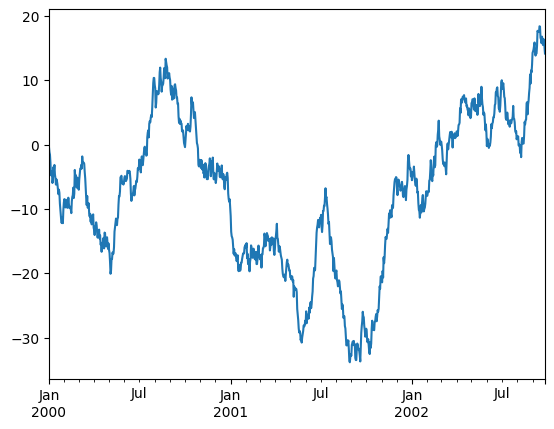

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();
plt.show()

### Explicación
`cumsum()` convierte ruido aleatorio en una trayectoria acumulada.
`ts.plot()` dibuja la Serie.
En notebooks suele mostrarse solo; `plt.show()` lo fuerza.

#### 11.3 Plot de un DataFrame (todas las columnas)

<Figure size 640x480 with 0 Axes>

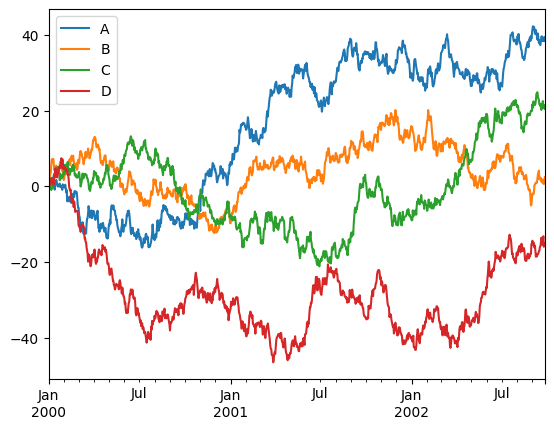

In [ ]:
df_plot = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df_plot = df_plot.cumsum()

plt.figure()
df_plot.plot()
plt.legend(loc="best")
plt.show()

### Explicación
`df_plot.plot()` dibuja todas las columnas en el mismo gráfico.
`legend(loc="best")` coloca la leyenda donde menos estorbe.
Útil para comparar varias señales/features con el mismo índice temporal.

## 12. Importación y exportación de datos (I/O)

## 12.1 Crear DataFrame de ejemplo (celda de código)

In [ ]:
df_io = pd.DataFrame(np.random.randint(0, 5, size=(10, 5)))
df_io

,0,1,2,3,4
0,2,4,0,4,1
1,0,0,3,1,0
2,3,1,1,0,0
3,4,0,3,3,3
4,4,1,4,1,3
5,2,3,0,3,4
6,4,3,4,3,3
7,1,1,2,3,3
8,4,2,4,1,3
9,2,0,2,0,2


### Explicación
Este DataFrame (`df_io`) se utilizará para demostrar cómo leer y escribir datos en diferentes formatos, como CSV, Parquet y Excel. Sus valores aleatorios y estructura simple lo hacen ideal para estos ejemplos de importación y exportación de datos.

##  CSV

## 12.2 Escribir a CSV: to_csv()

In [ ]:
df_io.to_csv("foo.csv")


### Explicación de `df.to_csv()`

El método `df.to_csv()` se utiliza para **escribir un DataFrame en un archivo CSV** (valores separados por comas). Es una función muy común para exportar datos procesados o limpios para su almacenamiento, compartición o uso en otras herramientas.

**Parámetros clave:**
*   **`path_or_buf`**: La ruta al archivo donde se guardará el CSV. En este caso, `'foo.csv'`. Si no se especifica una ruta, el CSV se devuelve como una cadena.
*   **`sep`**: El separador de columnas. Por defecto es una coma (`,`), pero se puede cambiar a `;`, `\t` (tabulador), etc.
*   **`index`**: Un valor booleano (`True` por defecto) que indica si se debe escribir el índice del DataFrame como una columna en el archivo CSV. En el ejemplo anterior, `index=False` significa que el índice del DataFrame *no* se guardará en el archivo CSV.

## 12.3 Leer CSV: read_csv()

In [ ]:
df_csv = pd.read_csv('foo.csv')
df_csv

,Unnamed: 0,0,1,2,3,4
0,0,2,4,0,4,1
1,1,0,0,3,1,0
2,2,3,1,1,0,0
3,3,4,0,3,3,3
4,4,4,1,4,1,3
5,5,2,3,0,3,4
6,6,4,3,4,3,3
7,7,1,1,2,3,3
8,8,4,2,4,1,3
9,9,2,0,2,0,2


### Explicación del problema 'Unnamed: 0' al leer CSV

Al leer archivos CSV en Pandas, es común encontrarse con una columna extra llamada `Unnamed: 0`.

**¿Por qué sucede?**
Este problema surge cuando se guarda un DataFrame a un archivo CSV usando `df.to_csv()` sin especificar `index=False`. Por defecto, `to_csv()` escribe el índice del DataFrame como una columna adicional en el archivo CSV. Cuando luego se lee este CSV con `pd.read_csv()`, Pandas interpreta esa columna de índice guardada como una columna de datos normal, y como no tiene un nombre explícito en el CSV, le asigna el nombre `Unnamed: 0`.

**¿Cómo se evita?**

1.  **Al guardar el CSV (método recomendado si no necesitas el índice):**
    Asegúrate de incluir `index=False` al exportar el DataFrame. Esto evita que el índice se escriba en el archivo CSV en primer lugar.
    ```python
    df_io.to_csv('foo.csv', index=False)
    ```
    (Este es el método que se usó en el paso anterior, por eso `df_csv` no mostró una columna `Unnamed: 0`.)

2.  **Al leer el CSV (si el archivo ya tiene el índice guardado):**
    Si estás leyendo un CSV que ya tiene el índice guardado como una columna, puedes indicarle a `pd.read_csv()` que utilice esa columna como el índice del DataFrame. Esto se hace con el parámetro `index_col`.
    ```python
    # Si 'Unnamed: 0' es la primera columna (posición 0)
    df_csv = pd.read_csv('nombre_archivo.csv', index_col=0)
    ```
    Esto le dice a Pandas que use la primera columna como índice en lugar de crear un índice nuevo por defecto y añadir la antigua columna de índice como `Unnamed: 0`.

## Parquet

## 12.4 (Solo si falla) Instalar engine Parquet

In [ ]:
pip install pyarrow

## 12.5 Escribir a Parquet: to_parquet()

In [ ]:
df_io.to_parquet('foo.parquet', index=False)

### Explicación de `df.to_parquet()`

El método `df.to_parquet()` se utiliza para **escribir un DataFrame en un archivo Parquet**. Parquet es un formato de almacenamiento de datos columnar que es muy eficiente en términos de espacio y rendimiento para grandes conjuntos de datos, especialmente en entornos de procesamiento distribuido como Apache Spark.

**Parámetros clave:**
*   **`path`**: La ruta al archivo donde se guardará el Parquet. En este caso, `'foo.parquet'`.
*   **`index`**: Un valor booleano (`True` por defecto) que indica si se debe escribir el índice del DataFrame como una columna en el archivo Parquet. En el ejemplo anterior, `index=False` significa que el índice del DataFrame *no* se guardará en el archivo.
*   **`engine`**: El motor de escritura a utilizar. Los comunes son `'pyarrow'` (el predeterminado y recomendado) o `'fastparquet'`. Si no está instalado, Pandas puede sugerir la instalación de `pyarrow`.

## 12.6 Leer Parquet: read_parquet()

In [ ]:
df_parquet = pd.read_parquet('foo.parquet')
df_parquet

,0,1,2,3,4
0,2,4,0,4,1
1,0,0,3,1,0
2,3,1,1,0,0
3,4,0,3,3,3
4,4,1,4,1,3
5,2,3,0,3,4
6,4,3,4,3,3
7,1,1,2,3,3
8,4,2,4,1,3
9,2,0,2,0,2


### Explicación de `pd.read_parquet()`

El método `pd.read_parquet()` se utiliza para **leer datos de un archivo en formato Parquet y cargarlos en un DataFrame de Pandas**. Este método es el complemento de `to_parquet()` y es fundamental para trabajar con este formato eficiente.

**Beneficios del formato Parquet:**
*   **Almacenamiento columnar**: A diferencia de CSV (que es de filas), Parquet almacena los datos por columnas. Esto significa que al leer solo ciertas columnas, se carga menos información, lo que acelera las consultas.
*   **Compresión eficiente**: Ofrece una excelente compresión de datos, lo que reduce el tamaño de los archivos en disco y el ancho de banda necesario para transferirlos.
*   **Esquema incorporado**: Los archivos Parquet incluyen metadatos que describen el esquema de los datos, lo que facilita la interoperabilidad y la validación de los datos.
*   **Optimizado para big data**: Es ampliamente utilizado en entornos de procesamiento de grandes volúmenes de datos como Apache Spark, Hadoop y Dask debido a sus ventajas en rendimiento y eficiencia.

**Necesidad de un motor (engine) como `pyarrow`:**
Pandas no tiene una implementación nativa completa para leer/escribir Parquet. En su lugar, se basa en librerías de terceros (motores) para realizar estas operaciones. Las dos librerías principales son:
*   **`pyarrow`**: Es el motor recomendado y predeterminado para Pandas, desarrollado por Apache y parte del ecosistema de Apache Arrow. Proporciona una interfaz de alto rendimiento para trabajar con datos columnares.
*   **`fastparquet`**: Otra opción popular, escrita principalmente en Python y Numba.

Si no se tiene instalado un motor compatible (como `pyarrow`), `pd.read_parquet()` fallará. Por eso, es una buena práctica asegurar que `pyarrow` esté instalado (`pip install pyarrow`) antes de intentar leer o escribir archivos Parquet.

##  Excel

## 12.7 Escribir a Excel: to_excel()

In [ ]:
df_io.to_excel("foo.xlsx", sheet_name="Sheet1")


### Explicación de `df.to_excel()`

El método `df.to_excel()` se utiliza para **escribir un DataFrame en un archivo de Excel** (en formato `.xlsx` o `.xls`). Es una función muy común para exportar datos procesados o limpios para su almacenamiento, compartición o uso en otras herramientas que manejan hojas de cálculo.

**Parámetros clave:**
*   **`excel_writer`**: La ruta al archivo donde se guardará el Excel. En este caso, `'foo.xlsx'`.
*   **`sheet_name`**: (Opcional) El nombre de la hoja en el archivo de Excel. Por defecto, es `Sheet1`.
*   **`index`**: Un valor booleano (`True` por defecto) que indica si se debe escribir el índice del DataFrame como una columna en el archivo de Excel. En el ejemplo anterior, `index=False` significa que el índice del DataFrame *no* se guardará en el archivo.
*   **`header`**: (Opcional) Un valor booleano (`True` por defecto) que indica si se deben escribir los nombres de las columnas en la primera fila del archivo de Excel.

Al usar `index=False` se evita la creación de una columna `Unnamed: 0` al leer el archivo Excel posteriormente, lo cual es una buena práctica si el índice no contiene información relevante que deba ser conservada como una columna de datos.

## 12.8 Leer Excel: read_excel()

In [ ]:
df_excel = pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])
df_excel


,Unnamed: 0,0,1,2,3,4
0,0,2,4,0,4,1
1,1,0,0,3,1,0
2,2,3,1,1,0,0
3,3,4,0,3,3,3
4,4,4,1,4,1,3
5,5,2,3,0,3,4
6,6,4,3,4,3,3
7,7,1,1,2,3,3
8,8,4,2,4,1,3
9,9,2,0,2,0,2


In [ ]:
# Variante opcional
# Guardar sin índice para evitar "Unnamed: 0"
df_io.to_excel("foo.xlsx", sheet_name="Sheet1", index=False)
pd.read_excel("foo.xlsx", "Sheet1")


,0,1,2,3,4
0,2,4,0,4,1
1,0,0,3,1,0
2,3,1,1,0,0
3,4,0,3,3,3
4,4,1,4,1,3
5,2,3,0,3,4
6,4,3,4,3,3
7,1,1,2,3,3
8,4,2,4,1,3
9,2,0,2,0,2


### Explicación de `pd.read_excel()`

El método `pd.read_excel()` se utiliza para **leer datos de un archivo de Excel y cargarlos en un DataFrame de Pandas**. Es el complemento de `to_excel()` y es fundamental para trabajar con este formato común.

**Parámetros clave:**
*   **`io`**: La ruta al archivo de Excel (`.xlsx`, `.xls`, etc.). En este caso, `'foo.xlsx'`.
*   **`sheet_name`**: (Opcional) Especifica qué hoja del libro de Excel leer. Puede ser un nombre de cadena, un índice entero (0-indexed), o una lista de nombres/índices. Por defecto, lee la primera hoja.
*   **`header`**: (Opcional) Fila (0-indexed) a usar para los nombres de las columnas. Por defecto, es `0` (la primera fila).
*   **`index_col`**: (Opcional) Columna(s) a usar como índice del DataFrame. Puede ser un nombre de columna o un índice entero (0-indexed). Si se usa `index=False` al guardar con `to_excel()`, no se necesita este parámetro.
*   **`names`**: (Opcional) Una lista de nombres para las columnas si el archivo no tiene encabezado o se desea renombrarlos.

En este ejemplo, dado que se guardó el archivo con `index=False` y el Excel tiene un encabezado implícito (las columnas numéricas), `pd.read_excel('foo.xlsx')` lee los datos directamente sin problemas de índices adicionales o nombres de columna incorrectos.

## 13. Gotchas (Boolean ambiguity)

### 13.1 Ejemplo que da error (celda de código)

In [ ]:
import pandas as pd

if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Explicación
Un Series contiene muchos valores booleanos.
Python espera un solo True/False en un `if`.
Por eso pandas lanza: “`ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().`”

### 13.2 Formas correctas (lo que te está diciendo el error)

A) “¿Hay algún True?” → `any()`

In [ ]:
s = pd.Series([False, True, False])

if s.any():
    print("Hay al menos un True")

Hay al menos un True


B) “¿Son todos True?” → `all()`

In [ ]:
s = pd.Series([False, True, False]) # Aseguramos que 's' está definida
if s.all():
    print("Todos son True")
else:
    print("No todos son True")

No todos son True


C) “¿Está vacío?” → `empty`

In [ ]:
s = pd.Series([]) # Creamos una serie vacía para el ejemplo
if s.empty:
    print("Serie vacía")
else:
    print("Serie NO vacía")

Serie vacía


D) Si realmente esperas un solo valor → `item()`

In [ ]:
single = pd.Series([True])
if single.item():
    print("Single era True")

Single era True


### Explicación
`any()`: resume a un booleano: `True` si hay al menos un `True`.

`all()`: resume a un booleano: `True` si todos son `True`.

`empty`: comprueba si hay datos.


`item()`: solo funciona cuando el Series tiene un único elemento.

(Extra útil ML) Gotcha típico con filtros: usa `&` y `|`, no `and`/`or`

In [ ]:
import pandas as pd

df = pd.DataFrame({"A":[1,2,3], "B":[0,1,0]})

# Correcto:
df[(df["A"] > 1) & (df["B"] == 1)]

,A,B
1,2,1


### Explicación
En pandas, para combinar condiciones element-wise:
usa `&` (AND) y `|` (OR)
siempre con paréntesis.

**LISTA DE EJERCICIOS + PREGUNTAS**

**EJERCICIO 1 (ESTRUCTURAS)**

text
Crea df_edades = pd.DataFrame({'nombre': ['Ana','Bob',np.nan,'Clara'],
                              'edad': [25,30,np.nan,35]})
1. Muestra solo 'edad'
2. Cuenta NaN con isna().sum()

In [ ]:
df_edades = pd.DataFrame({
    'nombre': ['Ana','Bob',np.nan,'Clara'],
    'edad': [25,30,np.nan,35]
})
df_edades


,nombre,edad
0,Ana,25.0
1,Bob,30.0
2,NaN,NaN
3,Clara,35.0


**1) Muestra solo 'edad'**

**Opción A (como Serie):**

In [ ]:
df_edades['edad']


,edad
0,25.0
1,30.0
2,NaN
3,35.0


**Opción B (como DataFrame, si queremos mantener formato tabla):**

In [ ]:
df_edades[['edad']]


,edad
0,25.0
1,30.0
2,NaN
3,35.0


**2) Cuenta NaN con isna().sum()**

**NaN por columna**

In [ ]:
df_edades.isna().sum()


,0
nombre,1
edad,1


**Si piden NaN SOLO de la columna edad:**

In [ ]:
df_edades['edad'].isna().sum()


np.int64(1)

**Si piden NaN totales en todo el DataFrame:`**

In [ ]:
df_edades.isna().sum().sum()


np.int64(2)

**PREGUNTA 1 (ESTRUCTURAS)**

text
¿NaN en NumPy vs Pandas? Ejecuta:
np.array([1,np.nan,3]).mean()
pd.Series([1,np.nan,3]).mean()
¿Por qué Pandas da diferente?

In [ ]:
import numpy as np
import pandas as pd

np.array([1, np.nan, 3]).mean()
pd.Series([1, np.nan, 3]).mean()


np.float64(2.0)

**¿Por qué Pandas da diferente?**

**NumPy (array.mean):** si hay un NaN, la operación normal propaga el NaN : el resultado es NaN.
Porque mean() no ignora NaN por defecto.

**Pandas (Series.mean):** por defecto tiene skipna=True, o sea ignora los NaN y calcula la media con los valores válidos:

media = (1+3)/2 = 2.0

In [ ]:
#Si quisieramos que Pandas se comporte como NumPy (propagando NaN):

pd.Series([1, np.nan, 3]).mean(skipna=False)


np.float64(nan)

In [ ]:
#Y si queremos que NumPy ignore NaN como Pandas:

np.nanmean([1, np.nan, 3])


np.float64(2.0)

**EJERCICIO 2 (VISUALIZACIÓN)**

text

En df_edades:
1. describe()
2. Limpia NaN: fillna(edad_mean)
3. ¿Qué pasó con count?

In [ ]:
import numpy as np
import pandas as pd

#(por si acaso) recreamos df_edades
df_edades = pd.DataFrame({
    'nombre': ['Ana','Bob',np.nan,'Clara'],
    'edad': [25,30,np.nan,35]
})

#1) describe()
desc_antes = df_edades.describe()
desc_antes


,edad
count,3.0
mean,30.0
std,5.0
min,25.0
25%,27.5
50%,30.0
75%,32.5
max,35.0


**describe()** en columnas numéricas muestra: count, mean, std, min, 25%, 50%, 75%, max.

**count** cuenta solo valores NO-NaN.

In [ ]:
# 2)Limpia NaN: fillna(edad_mean)
edad_mean = df_edades["edad"].mean()   #por defecto ignora NaN (skipna=True)
df_edades_limpio = df_edades.copy()
df_edades_limpio["edad"] = df_edades_limpio["edad"].fillna(edad_mean)

edad_mean, df_edades_limpio


(np.float64(30.0),
   nombre  edad
 0    Ana  25.0
 1    Bob  30.0
 2    NaN  30.0
 3  Clara  35.0)

In [ ]:
desc_despues = df_edades_limpio.describe() #Describe después
desc_despues


,edad
count,4.000000
mean,30.000000
std,4.082483
min,25.000000
25%,28.750000
50%,30.000000
75%,31.250000
max,35.000000


**3) ¿Qué pasó con count?**

**Antes:** count en edad era 3 porque había 1 NaN (25, 30, 35).

**Después:** count pasa a 4 porque ya no hay NaN: se rellenó con la media.

**PREGUNTA 2 (VISUALIZACIÓN)**

text

¿df.to_numpy() vs df.values? ¿dtype único?

**¿df.to_numpy() vs df.values?**

**df.to_numpy()** es el método recomendado y explícito para obtener un numpy.ndarray. Y **df.values** es una propiedad “legacy” (histórica). En general devuelve lo mismo, pero to_numpy() es más claro y configurable.

In [ ]:
#Ejemplo

arr1 = df.to_numpy()
arr2 = df.values
type(arr1), type(arr2)


(numpy.ndarray, numpy.ndarray)

**¿dtype único?**

**Sí**, en NumPy, un array 2D tiene un solo dtype para todo el array.
En un DataFrame, cada columna puede tener un dtype distinto (ej: float, int, datetime, category, str).
Al hacer to_numpy(), Pandas busca un dtype común que pueda contenerlo todo:

**Si todo es numérico:** dtype numérico (float/int)

**Si hay mezcla** (fechas + strings + categorías) : suele convertirse a dtype=object

In [ ]:
import numpy as np
import pandas as pd

df2 = pd.DataFrame({
    'A': 1.0,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})

#Ejemplo con df2:
df2.dtypes
df2.to_numpy().dtype

dtype('O')

**to_numpy()** es útil para modelos/operaciones NumPy, pero si tu DataFrame tiene texto/categorías/fechas, te puede salir object : normalmente antes haces limpieza/encoding.

**EJERCICIO 3 (SELECCIÓN)**

text
df_random = pd.DataFrame(np.random.randn(10,3), columns=['A','B','C'])
1. Filas donde A > A.mean() con loc
2. Nueva columna 'media' = (A+B+C)/3

In [ ]:
import numpy as np
import pandas as pd

# Creamos DataFrame aleatorio
df_random = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'])
df_random


,A,B,C
0,-1.561983,-1.150753,-0.124811
1,-0.514262,0.468151,-0.359181
2,-0.325455,-0.201024,0.193618
3,-0.094481,0.161071,2.016046
4,-0.678587,0.177316,-1.183566
5,-0.307844,2.284473,-1.031160
6,0.825053,-1.400788,1.112592
7,2.455933,0.832153,1.132626
8,-0.149492,0.587616,0.295754
9,0.029307,0.450861,0.007282


In [ ]:
#1) Filas donde A > A.mean() con loc

umbral = df_random['A'].mean()
filtrado = df_random.loc[df_random['A'] > umbral]
umbral, filtrado


(np.float64(-0.03218104774632704),
           A         B         C
 6  0.825053 -1.400788  1.112592
 7  2.455933  0.832153  1.132626
 9  0.029307  0.450861  0.007282)

**df_random['A'].mean()** calcula la media de la columna A.

**df_random['A'] > umbral** crea una máscara booleana (True/False).

**loc[mascara]** filtra filas por condición.

In [ ]:
#2) Nueva columna 'media' = (A+B+C)/3

df_random['media'] = (df_random['A'] + df_random['B'] + df_random['C']) / 3
df_random


,A,B,C,media
0,-1.561983,-1.150753,-0.124811,-0.945849
1,-0.514262,0.468151,-0.359181,-0.135097
2,-0.325455,-0.201024,0.193618,-0.110954
3,-0.094481,0.161071,2.016046,0.694212
4,-0.678587,0.177316,-1.183566,-0.561612
5,-0.307844,2.284473,-1.031160,0.315156
6,0.825053,-1.400788,1.112592,0.178952
7,2.455933,0.832153,1.132626,1.473571
8,-0.149492,0.587616,0.295754,0.244626
9,0.029307,0.450861,0.007282,0.162483


Creamos una nueva feature (media) combinando columnas.

Típico en ML: feature engineering.

**PREGUNTA 3 (SELECCIÓN)**

text

df.loc['2026-01-02':'2026-01-04'] ¿incluye endpoints?
vs NumPy slicing.

**¿df.loc['2026-01-02':'2026-01-04'] incluye endpoints?**

Sí. En loc (slicing por etiqueta), incluye ambos extremos:
incluye '2026-01-02' y también '2026-01-04'.


**¿vs NumPy slicing?**

En NumPy (y también en iloc), el slicing por posiciones es [inicio, fin):
incluye el iniciono pero no incluye el final

In [ ]:
#Ejemplo NumPy

arr = np.arange(10)
arr[2:5]   # incluye 2,3,4 (no incluye 5)


array([2, 3, 4])

**breve resumen:**

loc (etiquetas) : incluye endpoints

iloc / NumPy slicing (posiciones) : NO incluye el endpoint final

**EJERCICIO 4 (NAN)**

text

df_nan = df_random.copy()
df_nan.iloc[2:5,1] = np.nan
1. dropna(how='any')
2. fillna(df_nan.mean())

In [ ]:
#Crear df_nan y meter NaN)

import numpy as np
import pandas as pd

# (por si acaso) recreamos df_random
df_random = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'])

df_nan = df_random.copy()
df_nan.iloc[2:5, 1] = np.nan   # filas 2,3,4 en la columna B (posición 1)
df_nan


,A,B,C
0,-1.349509,-0.661472,0.810037
1,-0.938794,-0.596979,-0.103739
2,-0.696733,NaN,-0.622712
3,0.726363,NaN,0.217025
4,0.656972,NaN,1.168217
5,-1.520444,-0.270925,-0.184614
6,0.298288,-0.540617,-0.087398
7,0.356056,-1.485354,-0.048492
8,0.560920,1.229104,0.870235
9,0.707806,0.500034,-1.098825


**copy()** evita modificar el original.

**iloc[2:5, 1]** selecciona por posición:

filas 2 a 4 (el 5 no se incluye)

columna 1 = 'B'

**Se insertan NaN en esa zona.**

In [ ]:
#1) dropna(how='any')

df_nan_drop = df_nan.dropna(how='any')
df_nan_drop


,A,B,C
0,-1.349509,-0.661472,0.810037
1,-0.938794,-0.596979,-0.103739
5,-1.520444,-0.270925,-0.184614
6,0.298288,-0.540617,-0.087398
7,0.356056,-1.485354,-0.048492
8,0.560920,1.229104,0.870235
9,0.707806,0.500034,-1.098825


Elimina cualquier fila que tenga al menos un NaN

Como los NaN están en B, filas 2-4,esas filas desaparecen

In [ ]:
#2) fillna(df_nan.mean())

# df_nan.mean() calcula la media por columna (ignora NaN por defecto)
medias = df_nan.mean()
medias


,0
A,-0.119907
B,-0.260887
C,0.091973


In [ ]:
df_nan_fill = df_nan.fillna(medias)
df_nan_fill


,A,B,C
0,-1.349509,-0.661472,0.810037
1,-0.938794,-0.596979,-0.103739
2,-0.696733,-0.260887,-0.622712
3,0.726363,-0.260887,0.217025
4,0.656972,-0.260887,1.168217
5,-1.520444,-0.270925,-0.184614
6,0.298288,-0.540617,-0.087398
7,0.356056,-1.485354,-0.048492
8,0.560920,1.229104,0.870235
9,0.707806,0.500034,-1.098825


**df_nan.mean()** devuelve una Serie con la media de cada columna.


**fillna(Serie)** rellena NaN usando el valor correspondiente de su misma columna.

En ML esto es **“imputación por media”**

**PREGUNTA 4 (NaN)**

text

df[df>0] = -df ¿por qué solo afecta >0?

**df[df > 0] = -df ¿por qué solo afecta >0?**

Porque **df > 0** crea una máscara booleana del mismo tamaño que df:

Donde la condición es True (valores > 0), se asigna lo que está a la derecha.

Donde es False (valores ≤ 0 o NaN), no se toca y se queda igual.

In [ ]:
#En este caso

df[df > 0] = -df

#Pandas alinea por posiciones y reemplaza solo en las celdas donde la máscara es True

In [ ]:
#Ejemplo
tmp = pd.DataFrame({"A": [2, -3], "B": [-1, 4]})
tmp[tmp > 0] = -tmp
tmp



,A,B
0,-2,-1
1,-3,-4


Resultado:

2 → -2 (porque era >0)

-3 se queda -3 (no cumple)

-1 se queda -1 (no cumple)

4 → -4 (porque era >0)

**EJERCICIO 5 (ESTADÍSTICOS)**

text

1. df_random.std(axis=1).head()
2. ¿Qué significa std=0?

In [ ]:
import numpy as np
import pandas as pd

# (por si acaso) recreamos df_random
df_random = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'])

# 1) std por fila (axis=1) y ver las primeras 5
df_random.std(axis=1).head()


,0
0,1.150203
1,0.900903
2,0.496544
3,0.409214
4,0.666799


**std(axis=1)** calcula la desviación estándar de cada fila, usando las columnas A, B y C.

**.head()** muestra las primeras 5 filas para revisar rápido.

**2) ¿Qué significa std = 0?**

std = 0 significa que no hay variación en esa fila (todos los valores son iguales).
Ejemplo: si una fila fuese [2, 2, 2], entonces su desviación estándar es 0.


**PREGUNTA 5 (ESTADÍSTICOS)**

text
np.std(ddof=1) vs ddof=0 ¿varianza muestral/poblacional?

**np.std(ddof=1) vs ddof=0 ¿muestral/poblacional?**

**ddof=0 (default)** = **poblacional**: divide por N
(asumes que tus datos son toda la población).

**ddof=1** = **muestral**: divide por N−1 (corrección de Bessel)
(asumes que tus datos son una muestra y quieres estimar la varianza de la población).

In [ ]:
x = np.array([1, 2, 3, 4], dtype=float)

np.std(x, ddof=0), np.std(x, ddof=1)


(np.float64(1.118033988749895), np.float64(1.2909944487358056))

**ddof=0** = población (N)
**ddof=1** = muestra (N−1)

**EJERCICIO 6 (GROUPBY/PIVOT)**


text

df_group = pd.DataFrame({'grupo':['X','X','Y','Y'],
                        'valores': [1,2,3,4]})
1. groupby('grupo')['valores'].mean()
2. pivot_table(values='valores', index='grupo')

In [ ]:
import pandas as pd

df_group = pd.DataFrame({
    'grupo': ['X', 'X', 'Y', 'Y'],
    'valores': [1, 2, 3, 4]
})
df_group


,grupo,valores
0,X,1
1,X,2
2,Y,3
3,Y,4


In [ ]:
#1) groupby('grupo')['valores'].mean()

df_group.groupby('grupo')['valores'].mean()


,valores
grupo,
X,1.5
Y,3.5


Se divide por grupo (X, Y) y calcula la media de valores en cada grupo.

In [ ]:
#2) pivot_table(values='valores', index='grupo')
pd.pivot_table(df_group, values='valores', index='grupo')



,valores
grupo,
X,1.5
Y,3.5


Resume en formato “tabla dinámica”.
Por defecto el agregador es mean, así que da lo mismo que el groupby aquí.

PREGUNTA 6 Final (ML)

text

¿Por qué categoricals > strings en ML? (memoria, groupby)

**¿Por qué categorical > string en ML? (memoria, groupby)**

**Memoria:** category guarda un diccionario de categorías + códigos enteros. En vez de repetir strings, guarda números = suele ocupar mucho menos.

**Velocidad en groupby/joins**: agrupar/ordenar/filtrar con códigos enteros es más rápido que comparar strings repetidos.

**Calidad de datos:** categorías limitan valores posibles (menos errores tipo “X ” vs “x” vs “X”), ayudando a limpiar datos.

**Preparación para ML:** muchas transformaciones (one-hot / encoding) trabajan naturalmente con categorías (códigos) y evitan inconsistencias.

In [ ]:
#Ejemplo del caso

s_str = pd.Series(["Madrid"] * 10000 + ["Valencia"] * 10000)
s_cat = s_str.astype("category")

print("Memoria string:", s_str.memory_usage(deep=True))
print("Memoria categorical:", s_cat.memory_usage(deep=True))


Memoria string: 1120132
Memoria categorical: 20352


EJERCICIO 7 (MERGE)

text

df1 = pd.DataFrame({'id':[1,2], 'score':[85,90]})
df2 = pd.DataFrame({'id':[1,2], 'feature':[0.1,0.2]})
1. pd.merge(df1,df2,on='id')

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2], 'score': [85, 90]})
df2 = pd.DataFrame({'id': [1, 2], 'feature': [0.1, 0.2]})

pd.merge(df1, df2, on='id')


,id,score,feature
0,1,85,0.1
1,2,90,0.2


**merge hace una unión tipo SQL.**

**on='id'** significa que se juntan las filas donde id coincide.

**Como id es único en ambos DataFrames (1 y 2)**, el resultado es una unión 1 a 1 con columnas: id, score, feature.

**EJERCICIO Final: IRIS**

In [ ]:
#Cargar + crear df_iris

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["species"] = iris.target_names[iris.target]

df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**iris.data** trae las features numéricas.

**iris.target** son clases (0,1,2).

**iris.target_names[...]** convierte 0/1/2 a nombres de especie.

In [ ]:
#2) describe()

df_iris.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Nos facilita un resumen estadístico de las columnas numéricas (count, mean. std, percentiles...)

In [ ]:
#1) groupby('species').mean()

df_iris.groupby("species").mean(numeric_only=True)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Calcula la media de cada feature por especie

In [ ]:
#3) pivot_table('sepal length (cm)', 'species')

df_iris.pivot_table(values="sepal length (cm)", index="species")


,sepal length (cm)
species,
setosa,5.006
versicolor,5.936
virginica,6.588


**Tabla dinámica:** media de sepal length (cm) por especie (aggfunc por defecto = mean).

In [ ]:
#4) Guardar CSV: to_csv('iris_procesado.csv')

df_iris.to_csv("iris_procesado.csv", index=False)


Guarda el dataset procesdado procesado en CSV

**index=False** evita que aparezca una columna extra del índice al leerlo luego